# Group Case Study - Logistic Regression

## Lead Scoring Case Study

#### Problem Statement:
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

Objective:
1. To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.
2. To adjust to if the company's requirement changes in the future so you will need to handle these as well.


In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import all the necessary libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

## Step 1: Reading and Understanding the Data

In [3]:
leads_scoring=pd.read_csv("Leads.csv")
leads_scoring.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Checking the shape of the dataset

leads_scoring.shape

(9240, 37)

In [5]:
# Checking the column wise info of the dataset

leads_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads_scoring.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Displaying the columns of data

leads_scoring.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
# Displaying the first 5 rows

leads_scoring.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step 2: Data Preparation

In [9]:
# checking duplicates
sum(leads_scoring.duplicated(subset = 'Prospect ID')) == 0

True

No duplicate values

### Replacing Select values from Categorical columns
#### As we can observe that there are select values for many column. This is because customer did not select any option from the list, hence it shows select. So, replacing the Select option from categorical variables as it is esentially just a null value.

In [10]:
# Convert the 'Select' value in few columns to NaN value

leads_scoring = leads_scoring.replace('Select', np.nan)

In [11]:
# Missing values along rows
leads_scoring.isnull().sum(axis=1)

0       5
1       5
2       1
3       1
4       2
       ..
9235    1
9236    1
9237    1
9238    5
9239    1
Length: 9240, dtype: int64

In [12]:
# Missing values along columns
round(100*leads_scoring.isnull().sum()/len(leads_scoring.index),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

### 2.1 Treatment of missing values

#### Columns wise

In [13]:
# Dropping column with 45% or higher percentage of null values
leads_scoring=leads_scoring.drop(['How did you hear about X Education','Lead Profile', 'Lead Quality', 
                                  'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
                                 'Asymmetrique Profile Index', 'Asymmetrique Activity Index'],axis=1)

- Columns Prospect ID and Lead Number contains Unique ID’s assigned to customer and the Lead number which are not required while model building process. Hence, we  stored this columns in separate dataframe df_copy.

In [14]:
df_copy = leads_scoring[['Prospect ID', 'Lead Number']]

leads_scoring.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)
df_copy.head()

,Prospect ID,Lead Number
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737
1,2a272436-5132-4136-86fa-dcc88c88f482,660728
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719
4,3256f628-e534-4826-9d63-4a8b88782852,660681


In [15]:
#Finding the number of unique values under each column
leads_scoring.nunique().sort_values(ascending=False)

Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     18
Last Activity                                      17
Last Notable Activity                              16
What is your current occupation                     6
City                                                6
Lead Origin                                         5
What matters most to you in choosing a course       3
Newspaper Article                                   2
A free copy of Mastering The Interview              2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

In [16]:
# Dropping Columns with single value as it doesn't serve any use for analysis

leads_scoring=leads_scoring.drop(['Update me on Supply Chain Content','Get updates on DM Content','Magazine',
                                  'I agree to pay the amount through cheque','Receive More Updates About Our Courses'],axis=1)

In [17]:
# Get the value counts of all the columns

for column in leads_scoring:
    print(leads_scoring[column].astype('category').value_counts(normalize = True))
    print('___________________________________________________')

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
___________________________________________________
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
NC_EDM               0.000109
WeLearn              0.000109
blog                 0.000109
testone              0.000109
youtubechannel       0.000109
Name: Lead Source, dtype: float64
___________________________________________________
No     0.920563
Ye

Notice that when you got the value counts of all the columns, there were a few columns in which we can observe class imbalance. 

These include below columns:
Do Not Email, Do Not Call, Country, What matters most to you in choosing a course, Search, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations. 

Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.

In [18]:
# These are the columns which are highly imbalanced
imbalanced_cols = ['Do Not Email','Do Not Call','Country','What matters most to you in choosing a course',
               'Search','Newspaper Article','X Education Forums','Newspaper',
               'Digital Advertisement','Through Recommendations']

In [19]:
# Dropping above mentioned columns

leads_scoring.drop(imbalanced_cols,axis=1,inplace=True)

In [20]:
# Checking dataframe shape

leads_scoring.shape

(9240, 13)

In [21]:
# Check the number of null values again

round(100*leads_scoring.isnull().sum()/len(leads_scoring.index),2).sort_values(ascending=False)

City                                      39.71
Specialization                            36.58
Tags                                      36.29
What is your current occupation           29.11
Page Views Per Visit                       1.48
TotalVisits                                1.48
Last Activity                              1.11
Lead Source                                0.39
Last Notable Activity                      0.00
A free copy of Mastering The Interview     0.00
Total Time Spent on Website                0.00
Converted                                  0.00
Lead Origin                                0.00
dtype: float64

### Missing Value Treatment of Remaining Columns

#### Treating City Column missing values

In [22]:
# Checking value counts of the column
round(100*(leads_scoring.groupby('City').City.count()/len(leads_scoring.index)),2)

City
Mumbai                         34.87
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Thane & Outskirts               8.14
Tier II Cities                  0.80
Name: City, dtype: float64

'City' column has approximately 40% missing values. The Column has maximum occurence of 'Mumbai' and other values have very few occurences .Thus we can impute the missing values with 'Mumbai'

In [23]:
# Replaing missing values
leads_scoring['City'] = leads_scoring['City'].replace(np.nan, 'Mumbai')

#### Treating Tags column missing values

In [24]:
# Checking value counts of the column
round(100*(leads_scoring.groupby('Tags').Tags.count()/len(leads_scoring.index)),2).sort_values(ascending = False)

Tags
Will revert after reading the email                  22.42
Ringing                                              13.02
Interested in other courses                           5.55
Already a student                                     5.03
Closed by Horizzon                                    3.87
switched off                                          2.60
Busy                                                  2.01
Lost to EINS                                          1.89
Not doing further education                           1.57
Interested  in full time MBA                          1.27
Graduation in progress                                1.20
invalid number                                        0.90
Diploma holder (Not Eligible)                         0.68
wrong number given                                    0.51
opp hangup                                            0.36
number not provided                                   0.29
in touch with EINS                                 

#### Since some tags have very minimal values <0.09, we can replace them as "Other Tags" as they do not give important insights about the contribution. This will also help us to reduce number of independent variables during model building

In [25]:
# Replaing values
leads_scoring['Tags'] = leads_scoring['Tags'].replace(['Lost to Others', 'Want to take admission but has financial problems',
                                                      'Still Thinking', 'Interested in Next batch', 'In confusion whether part time or DLP',
                                                      'Lateral student', 'Shall take in the next coming month', 'University not recognized',
                                                      'Recognition issue (DEC approval)'], 'Other Tags')

Since we don't know what might be the status of missing value 'Tags', it is better to replace them with value 'Unknown'.

In [26]:
# Replaing missing values
leads_scoring['Tags']=leads_scoring['Tags'].replace(np.nan,'Not specified')

In [27]:
round(100*leads_scoring.isnull().sum()/len(leads_scoring.index),2).sort_values(ascending=False)

Specialization                            36.58
What is your current occupation           29.11
Page Views Per Visit                       1.48
TotalVisits                                1.48
Last Activity                              1.11
Lead Source                                0.39
Last Notable Activity                      0.00
A free copy of Mastering The Interview     0.00
City                                       0.00
Tags                                       0.00
Total Time Spent on Website                0.00
Converted                                  0.00
Lead Origin                                0.00
dtype: float64

#### Treating Specialization column missing values

In [28]:
# Checking value counts of the column
round(100*(leads_scoring.groupby('Specialization').Specialization.count()/len(leads_scoring.index)),2).sort_values(ascending=False)

Specialization
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Media and Advertising                 2.20
Travel and Tourism                    2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64

In [29]:
#Since Management is an import metric insde Specialisation, we could combine the entire Managements under one umbrella
#We will call this combo as Management_Specializations

leads_scoring['Specialization'] = leads_scoring['Specialization'].replace(['Finance Management','Human Resource Management',
                                                                           'Marketing Management','Operations Management',
                                                                           'IT Projects Management','Supply Chain Management',
                                                                           'Healthcare Management','Hospitality Management',
                                                                           'Retail Management'] ,'Management_Specializations') 

In [30]:
# Checking value counts of the column again
round(100*(leads_scoring.groupby('Specialization').Specialization.count()/len(leads_scoring.index)),2).sort_values(ascending=False)

Specialization
Management_Specializations           46.03
Business Administration               4.36
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
International Business                1.93
E-COMMERCE                            1.21
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64

37% values are missing in 'Specialization' & we don't have any information about those missing values. Hence replacing the null values with 'Not Specified'

In [31]:
# Replacing missing values
leads_scoring['Specialization'] = leads_scoring['Specialization'].replace(np.nan,'Not Specified')

#### Treating What is your current occupation missing values

In [32]:
# Checking value counts of the column
round(100*(leads_scoring.groupby('What is your current occupation')['What is your current occupation'].count()/len(leads_scoring.index)),2)

What is your current occupation
Businessman              0.09
Housewife                0.11
Other                    0.17
Student                  2.27
Unemployed              60.61
Working Professional     7.64
Name: What is your current occupation, dtype: float64

36% Data is missing in this column
Although 60% of Data is Unemployed, but it'd be wrong to impute this value ,hence we will impute it with Not Specified.

In [33]:
# Replacing missing values
leads_scoring['What is your current occupation']=leads_scoring['What is your current occupation'].replace(np.nan,'Not Specified')

In [34]:
# Check the number of null values again
round(100*leads_scoring.isnull().sum()/len(leads_scoring.index),2).sort_values(ascending=False)

Page Views Per Visit                      1.48
TotalVisits                               1.48
Last Activity                             1.11
Lead Source                               0.39
Last Notable Activity                     0.00
A free copy of Mastering The Interview    0.00
City                                      0.00
Tags                                      0.00
What is your current occupation           0.00
Specialization                            0.00
Total Time Spent on Website               0.00
Converted                                 0.00
Lead Origin                               0.00
dtype: float64

#### Inspecting & Treating missing values in 'Page Views Per Visit'

In [35]:
# Checking value counts of the column
round(100*(leads_scoring.groupby('Page Views Per Visit')['Page Views Per Visit'].count()/len(leads_scoring.index)),2)

Page Views Per Visit
0.00     23.69
1.00      7.05
1.14      0.02
1.17      0.01
1.19      0.01
         ...  
14.50     0.01
15.00     0.04
16.00     0.03
24.00     0.01
55.00     0.01
Name: Page Views Per Visit, Length: 114, dtype: float64

0.0 is the maximum occuring values , thus we will impute column with the same

In [36]:
# Check the median of the column

leads_scoring['Page Views Per Visit'].median()

2.0

In [37]:
# Replacing missing values
leads_scoring['Page Views Per Visit'].replace(np.nan,leads_scoring['Page Views Per Visit'].median(),inplace=True)

#### Treating missing values in Total Visits column

In [38]:
# Checking value counts of the column
round(100*(leads_scoring.groupby('TotalVisits')['TotalVisits'].count()/len(leads_scoring.index)),2)

TotalVisits
0.0      23.69
1.0       4.27
2.0      18.18
3.0      14.13
4.0      12.12
5.0       8.47
6.0       5.04
7.0       3.34
8.0       2.42
9.0       1.77
10.0      1.23
11.0      0.93
12.0      0.49
13.0      0.52
14.0      0.39
15.0      0.19
16.0      0.23
17.0      0.17
18.0      0.16
19.0      0.10
20.0      0.13
21.0      0.06
22.0      0.03
23.0      0.06
24.0      0.05
25.0      0.05
26.0      0.02
27.0      0.05
28.0      0.02
29.0      0.02
30.0      0.01
32.0      0.01
41.0      0.01
42.0      0.01
43.0      0.01
54.0      0.01
55.0      0.01
74.0      0.01
115.0     0.01
141.0     0.01
251.0     0.01
Name: TotalVisits, dtype: float64

0.0 is the maximum occuring values , thus we will impute collumn with the same

In [39]:
# Check the median of the column

leads_scoring['TotalVisits'].median()

3.0

In [40]:
# Replacing missing values
leads_scoring['TotalVisits'].replace(np.nan,leads_scoring['TotalVisits'].median(),inplace=True)

#### Treating missing values in Last Activity column

In [41]:
round(100*(leads_scoring.groupby('Last Activity')['Last Activity'].count()/len(leads_scoring.index)),2).sort_values(ascending=False)

Last Activity
Email Opened                    37.20
SMS Sent                        29.71
Olark Chat Conversation         10.53
Page Visited on Website          6.93
Converted to Lead                4.63
Email Bounced                    3.53
Email Link Clicked               2.89
Form Submitted on Website        1.26
Unreachable                      1.01
Unsubscribed                     0.66
Had a Phone Conversation         0.32
Approached upfront               0.10
View in browser link Clicked     0.06
Email Marked Spam                0.02
Email Received                   0.02
Resubscribed to emails           0.01
Visited Booth in Tradeshow       0.01
Name: Last Activity, dtype: float64

In [42]:
#replacing categories which are less than 1% to Others as it does not make much impact for analysis

leads_scoring['Last Activity'] = leads_scoring['Last Activity'].replace(['Unreachable', 'Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

Replacing nan values with maximum occuring value that is Email Opened.

In [43]:
leads_scoring['Last Activity']=leads_scoring['Last Activity'].replace(np.nan,'Email Opened')

#### Checking the values in Last Notable Activity columns

In [44]:
round(100*(leads_scoring.groupby('Last Notable Activity')['Last Notable Activity'].count()/len(leads_scoring.index)),2).sort_values(ascending=False)

Last Notable Activity
Modified                        36.87
Email Opened                    30.60
SMS Sent                        23.51
Page Visited on Website          3.44
Olark Chat Conversation          1.98
Email Link Clicked               1.87
Email Bounced                    0.65
Unsubscribed                     0.51
Unreachable                      0.35
Had a Phone Conversation         0.15
Email Marked Spam                0.02
View in browser link Clicked     0.01
Resubscribed to emails           0.01
Form Submitted on Website        0.01
Email Received                   0.01
Approached upfront               0.01
Name: Last Notable Activity, dtype: float64

In [45]:
#replacing categories which are less than 1% to Others as it does not make much impact for analysis

leads_scoring['Last Notable Activity'] = leads_scoring['Last Notable Activity'].replace(['Unreachable', 'Unsubscribed',
                                                                                         'Had a Phone Conversation', 
                                                                                         'Approached upfront',
                                                                                         'View in browser link Clicked',
                                                                                         'Email Marked Spam',
                                                                                         'Email Received','Resubscribed to emails',
                                                                                         'Visited Booth in Tradeshow'],'Others')

#### Treating Lead Source missing values

In [46]:
round(100*(leads_scoring.groupby('Lead Source')['Lead Source'].count()/len(leads_scoring.index)),2).sort_values(ascending=False)

Lead Source
Google               31.04
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
bing                  0.06
google                0.05
Click2call            0.04
Press_Release         0.02
Social Media          0.02
Live Chat             0.02
Pay per Click Ads     0.01
welearnblog_Home      0.01
NC_EDM                0.01
WeLearn               0.01
blog                  0.01
testone               0.01
youtubechannel        0.01
Name: Lead Source, dtype: float64

In [47]:
#Google is appearing twice in different case letters, removing this inconsistency

leads_scoring['Lead Source']=np.where(leads_scoring['Lead Source']=="google","Google",leads_scoring['Lead Source'])

In [48]:
# Facebook and Social media

leads_scoring['Lead Source'] = leads_scoring['Lead Source'].replace('Facebook','Social Media')

In [49]:
#Also we can combining low frequency values present in the Lead Source

leads_scoring['Lead Source'] = leads_scoring['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat',
                                                     'Pay per Click Ads','welearnblog_Home',
                                                    'NC_EDM', 'WeLearn','testone','blog','youtubechannel'] ,'Others') 

In [50]:
round(100*(leads_scoring['Lead Source'].value_counts()/len(leads_scoring.index)),2).sort_values(ascending=False)

Google              31.09
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Social Media         0.62
Others               0.23
Name: Lead Source, dtype: float64

In lead Source column, replacing null values with most occurring value "Google".

In [51]:
leads_scoring['Lead Source']=leads_scoring['Lead Source'].replace(np.nan,'Google')

In [52]:
# Check the number of null values again
round(100*leads_scoring.isnull().sum()/len(leads_scoring.index),2)

Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [53]:
# Checking Shape of dataframe after missing value treatment

leads_scoring.shape

(9240, 13)

### 2.2 Outlier Treatment

In [54]:
round(leads_scoring.describe(),2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.00,9240.00,9240.00,9240.00
mean,0.39,3.44,487.70,2.36
std,0.49,4.82,548.02,2.15
min,0.00,0.00,0.00,0.00
25%,0.00,1.00,12.00,1.00
50%,0.00,3.00,248.00,2.00
75%,1.00,5.00,936.00,3.00
max,1.00,251.00,2272.00,55.00


The features 'TotalVisits', 'Page Views Per Visit' have outliers and they can be capped at 0.01 and 0.99 th quantiles

#### 2.2.1 Page Views Per Visit Variable's Outlier Check

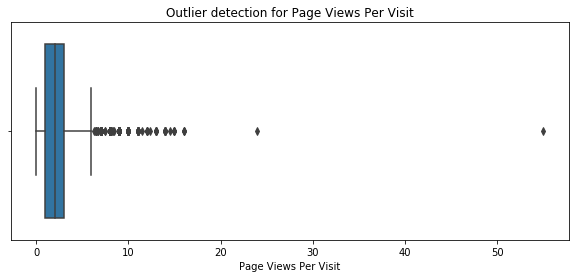

Median of Page Views Per Visit is 2.0


In [55]:
#Boxplot for  Page Views Per Visit

plt.figure(figsize=(10,4))

sns.boxplot(x=leads_scoring['Page Views Per Visit'])

## Formatting the figure
plt.title('Outlier detection for Page Views Per Visit')
plt.show()

print ('Median of Page Views Per Visit is', leads_scoring['Page Views Per Visit'].median())

#### Since there are Outliers present in the data, we need to remove them. We will cap it at 1%

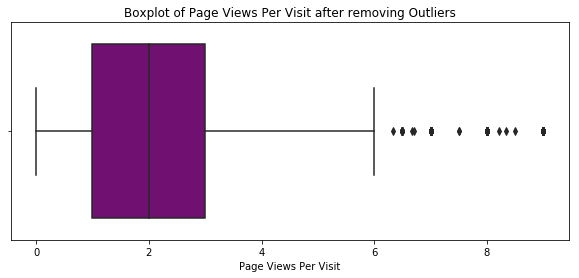

In [56]:
plt.figure(figsize=(10,4))

Q3 = leads_scoring['Page Views Per Visit'].quantile(0.99)

leads_scoring = leads_scoring[(leads_scoring['Page Views Per Visit'] <= Q3)]

Q1 = leads_scoring['Page Views Per Visit'].quantile(0.01)

leads_scoring = leads_scoring[(leads_scoring['Page Views Per Visit'] >= Q1)]

sns.boxplot(x=leads_scoring['Page Views Per Visit'],color = "purple")
plt.title("Boxplot of Page Views Per Visit after removing Outliers")
plt.show()

#### 2.2.2 Total Time Spent on Website Variable's Outlier Check

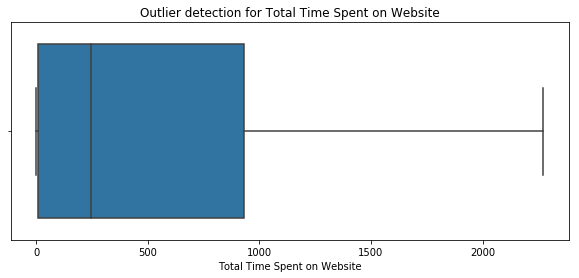

Median of "Total Time Spent on Website" is  247.0


In [57]:
#Outlier Detection of numeric variable using boxplot

plt.figure(figsize=(10,4))

sns.boxplot(x=leads_scoring['Total Time Spent on Website'])

plt.title('Outlier detection for Total Time Spent on Website')
plt.show()

print ('Median of "Total Time Spent on Website" is ', leads_scoring['Total Time Spent on Website'].median())

#### We can see there are no Outliers present in this data variable

#### 2.2.3 TotalVisits Variable's Outlier Check

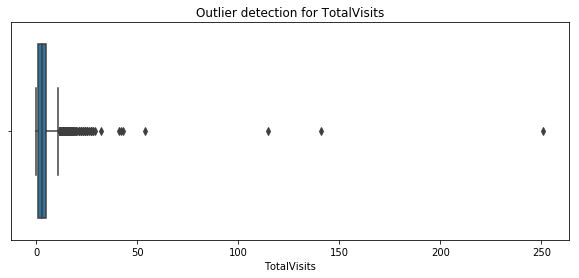

Median of TotalVisits is 3.0


In [58]:
#Setting the figure

plt.figure(figsize=(10,4))

sns.boxplot(x=leads_scoring['TotalVisits'])

## Formatting the figure
plt.title('Outlier detection for TotalVisits')
plt.show()

print ('Median of TotalVisits is', leads_scoring['TotalVisits'].median())

#### From the above boxplot we can see that there are Outliers present in the data

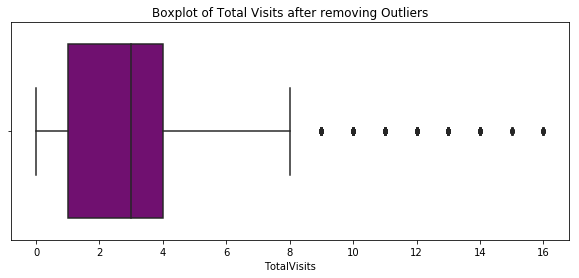

In [59]:
#Removing the Oultiers from the data

plt.figure(figsize=(10,4))

Q3 = leads_scoring['TotalVisits'].quantile(0.99)

leads_scoring = leads_scoring[(leads_scoring['TotalVisits'] <= Q3)]

Q1 = leads_scoring['TotalVisits'].quantile(0.01)

leads_scoring = leads_scoring[(leads_scoring['TotalVisits'] >= Q1)]

sns.boxplot(x=leads_scoring['TotalVisits'],color = "purple")
plt.title("Boxplot of Total Visits after removing Outliers")
plt.show()

In [60]:
round(leads_scoring.describe(),2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.00,9074.00,9074.00,9074.00
mean,0.38,3.12,484.13,2.26
std,0.49,2.82,547.40,1.88
min,0.00,0.00,0.00,0.00
25%,0.00,1.00,8.00,1.00
50%,0.00,3.00,246.00,2.00
75%,1.00,4.00,930.00,3.00
max,1.00,16.00,2272.00,9.00


In [61]:
round(100*(leads_scoring.Converted.value_counts()/len(leads_scoring.index)),2)

0    61.51
1    38.49
Name: Converted, dtype: float64

#### After Outlier Treatment, the data has 38.5% cases of Conversion and the data is also cleaned. Now we can start with the analysis.

## Step 3: Exploratory Data Analysis

In [62]:
# Displaying the column names
leads_scoring.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [63]:
leads_scoring.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Converted                               9074 non-null   int64  
 3   TotalVisits                             9074 non-null   float64
 4   Total Time Spent on Website             9074 non-null   int64  
 5   Page Views Per Visit                    9074 non-null   float64
 6   Last Activity                           9074 non-null   object 
 7   Specialization                          9074 non-null   object 
 8   What is your current occupation         9074 non-null   object 
 9   Tags                                    9074 non-null   object 
 10  City                                    9074 non-null   obje

### 3.1 Univariate Analysis

### 3.1.1 Categorical Variables

'Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation', 'Tags', 'City', 
'Last Activity', 'Last Notable Activity', 'A free copy of Mastering The Interview'

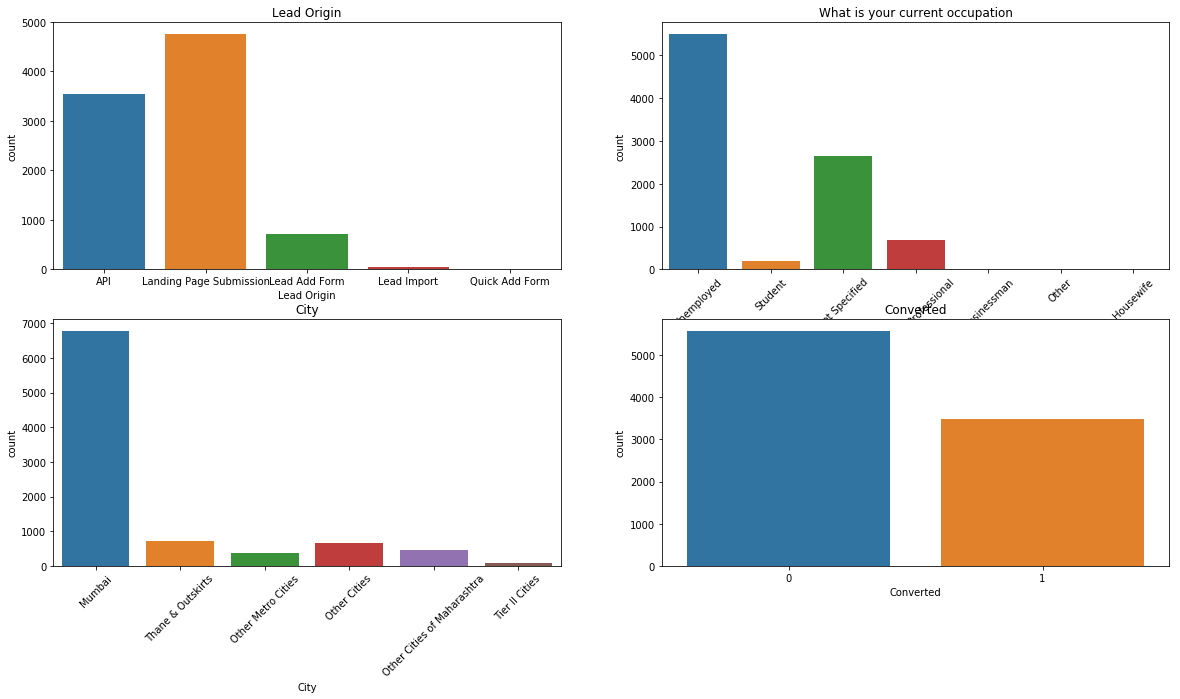

In [64]:
plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
sns.countplot(leads_scoring['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(2,2,2)
sns.countplot(leads_scoring['What is your current occupation'])
plt.xticks(rotation = 45)
plt.title('What is your current occupation')

plt.subplot(2,2,3)
sns.countplot(leads_scoring['City'])
plt.xticks(rotation = 45)
plt.title('City')

plt.subplot(2,2,4)
sns.countplot(leads_scoring['Converted'])
plt.title('Converted')


plt.show()

#### Lead Source

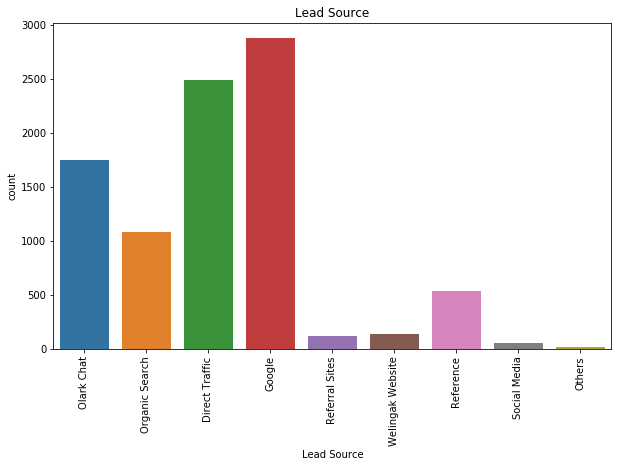

In [65]:
# Plotting Count Plot 
plt.figure(figsize=(10,6))
sns.countplot(leads_scoring['Lead Source'])
plt.xticks(rotation = 90)
plt.title('Lead Source')
plt.show()

#### Insights:
- 'Google' has highest number of count in Lead Source, followed by 'Direct Traffic' and 'Olark Chat'.
- 'Social Media', 'Referral Sites, and 'Others' have very less count.

#### Specialization

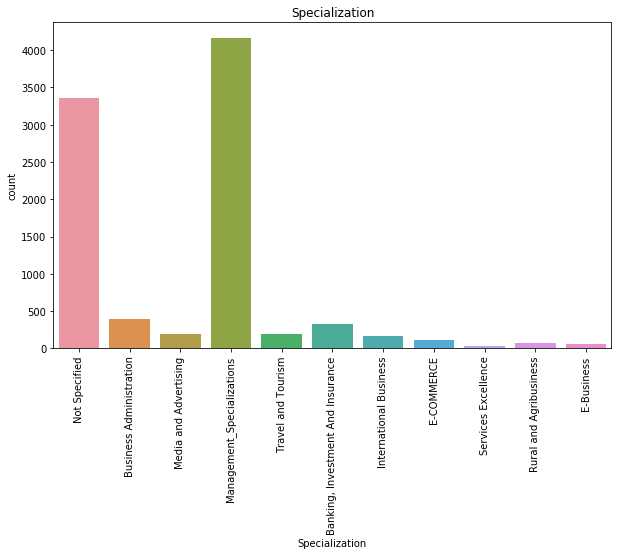

In [66]:
# Plotting Count Plot 
plt.figure(figsize=(10,6))
sns.countplot(leads_scoring['Specialization'])
plt.xticks(rotation = 90)
plt.title('Specialization')
plt.show()

#### Insights:
- 'Management_specializations' has highest number of count under Specializations category.
- 'Services Excellence', 'E-commerce' and 'E-business' have very less number of count.

#### Last Activity

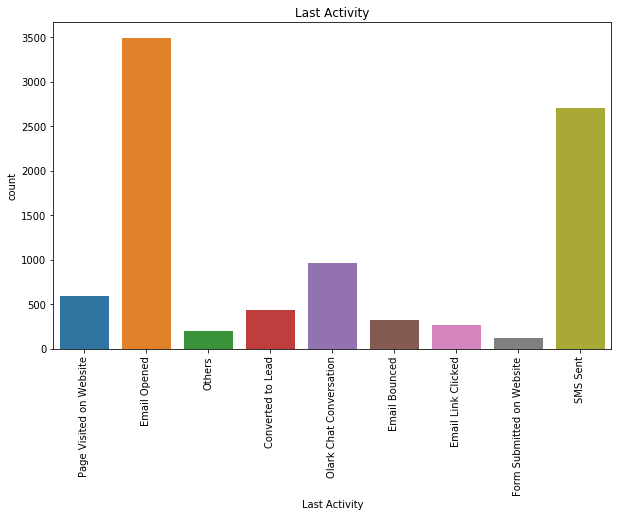

In [67]:
# Plotting Count Plot 
plt.figure(figsize=(10,6))
sns.countplot(leads_scoring['Last Activity'])
plt.xticks(rotation = 90)
plt.title('Last Activity')
plt.show()

#### Insights:
- 'Email Opened' and 'SMS Sent' are the 2 main categories we need to focus in Last Activity.

#### Last Notable Activity

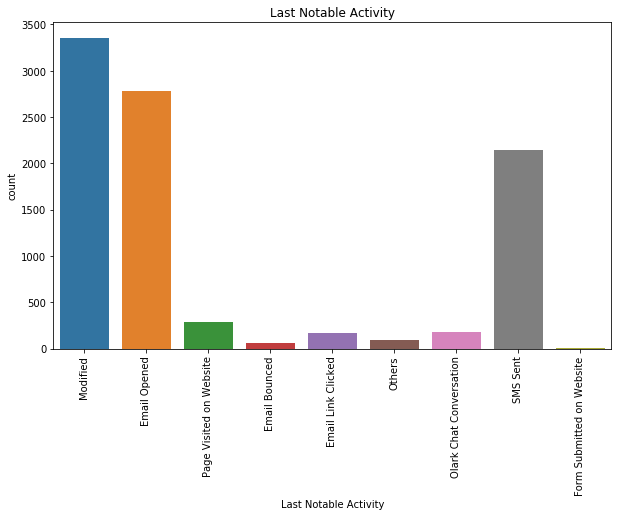

In [68]:
# Plotting Count Plot 
plt.figure(figsize=(10,6))
sns.countplot(leads_scoring['Last Notable Activity'])
plt.xticks(rotation = 90)
plt.title('Last Notable Activity')
plt.show()

#### Insights:
- 'Modified', 'Email Opened' and 'SMS Sent' are some of the categories under Last Notable Activity which we need to focus.

#### Tags

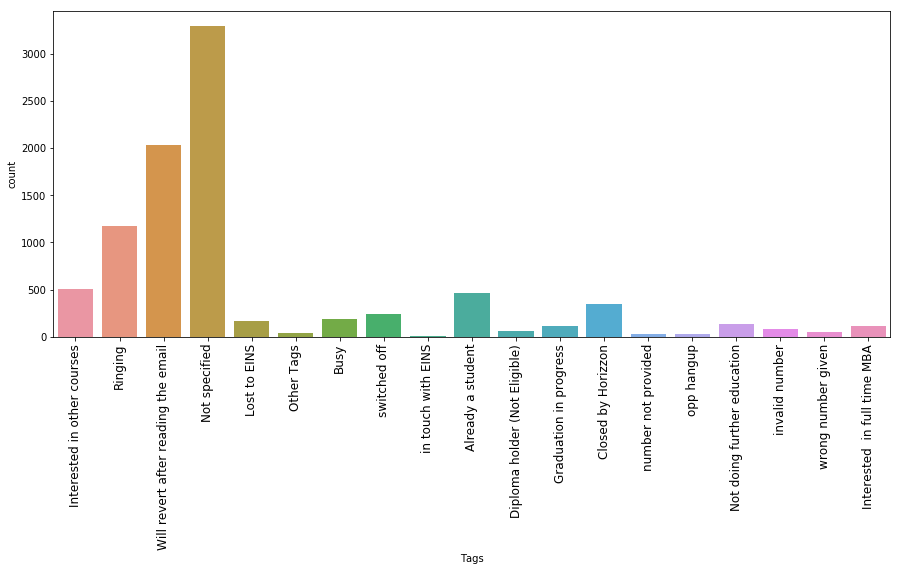

In [69]:
# Plotting Count Plot 
plt.figure(figsize=(15,6))
sns.countplot(leads_scoring['Tags'])
plt.xticks(fontsize = 12, rotation = 90)
plt.show()

#### Insights:
- We can try to consider the option 'Will revert after reaing the email' as it has highest number of count in Tags.

### 3.1.2 Visualization of Categorical Variable based on Converted value (Target value)

#### Leads Conversion based on occupation

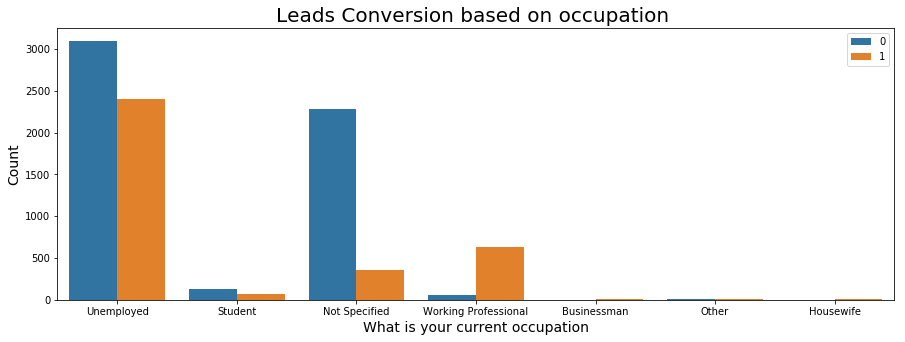

In [70]:
#Setting the frame
plt.figure(figsize=(15,5))

#Visualising using Countplot
count_plot=sns.countplot(leads_scoring['What is your current occupation'], hue=leads_scoring['Converted'])
count_plot.set_xticklabels(count_plot.get_xticklabels(),rotation=0)

#Formatting the plot
plt.title("Leads Conversion based on occupation ",fontsize=20)
plt.xlabel("What is your current occupation", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

#### Insights:
- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in numbers but has around 30-35% conversion rate.
- Businessman and Housewife are very less in count.

#### Leads Conversion based on Tags

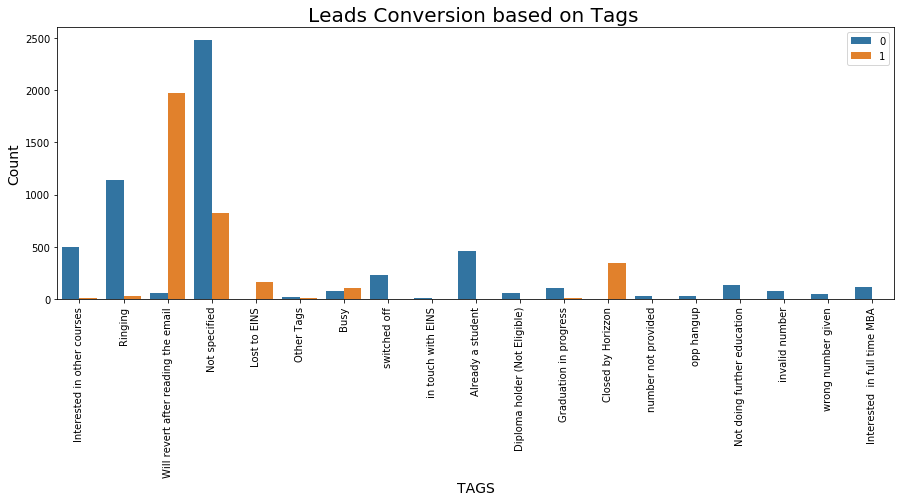

In [71]:
#Countplot on Tag variable

#Setting the frame
plt.figure(figsize=(15,5))

#Visualising using Countplot

count_plot=sns.countplot(leads_scoring['Tags'], hue=leads_scoring['Converted'])
count_plot.set_xticklabels(count_plot.get_xticklabels(),rotation=90)

#Formatting the plot
plt.title("Leads Conversion based on Tags ",fontsize=20)
plt.xlabel("TAGS", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

#### Insights:
- 'Will revert after reading the email' and 'Closed by horizon' have high conversion rate.
- 'Lost to ENS' also has good conversion rate but count of lead is very low.

#### Leads Conversion based on Lead Source

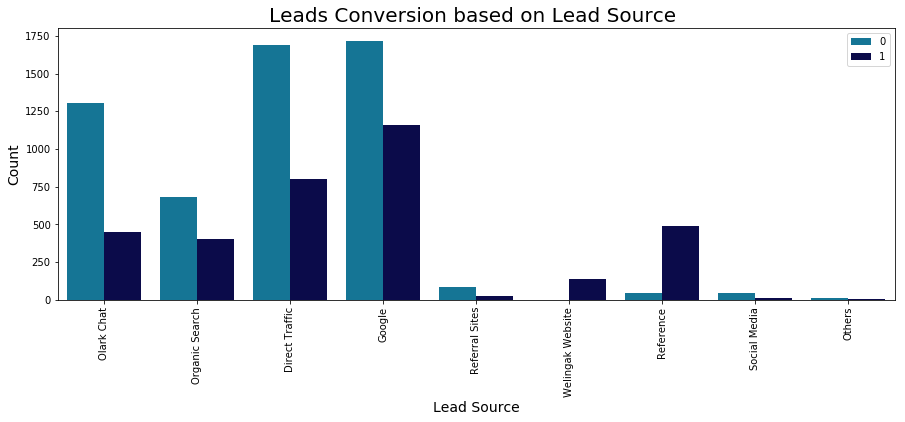

In [72]:
#Countplot on Lead Source variable

#Setting the frame
plt.figure(figsize=(15,5))

#Visualising using Countplot
count_plot=sns.countplot(leads_scoring['Lead Source'], hue=leads_scoring['Converted'],palette='ocean_r')
count_plot.set_xticklabels(count_plot.get_xticklabels(),rotation=90)

#Formatting the plot
plt.title("Leads Conversion based on Lead Source ",fontsize=20)
plt.xlabel("Lead Source", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

#### Insights:
- Most of the leads generated are through Google and Direct traffic and the least through Live Chat.
- Welingak website has the most conversion rate.
- Lead conversion can be improved by maxising leads from Reference and welingak website.
- Focussing Olark chat, Organic search, Direct traffic, and google leads may increase the lead conversion.

#### Leads Conversion based on Lead Origin

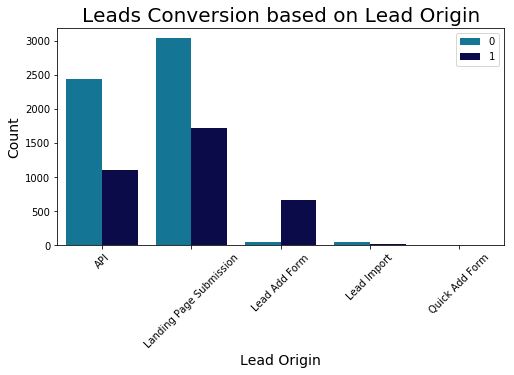

In [73]:
#Countplot on Lead Origin variable

#Setting the frame
plt.figure(figsize=(8,4))

#Visualising using Countplot
count_plot=sns.countplot(leads_scoring['Lead Origin'], hue=leads_scoring['Converted'],palette='ocean_r')
count_plot.set_xticklabels(count_plot.get_xticklabels(),rotation=45)

#Formatting the plot
plt.title("Leads Conversion based on Lead Origin",fontsize=20)
plt.xlabel("Lead Origin", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

#### Insights:
- API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are significant.
- Lead Add Form has more than 90% conversion rate but count of lead are less.
- Lead Import are very less in count for converted and non-converted leads.

#### Leads Conversion based on Last Activity

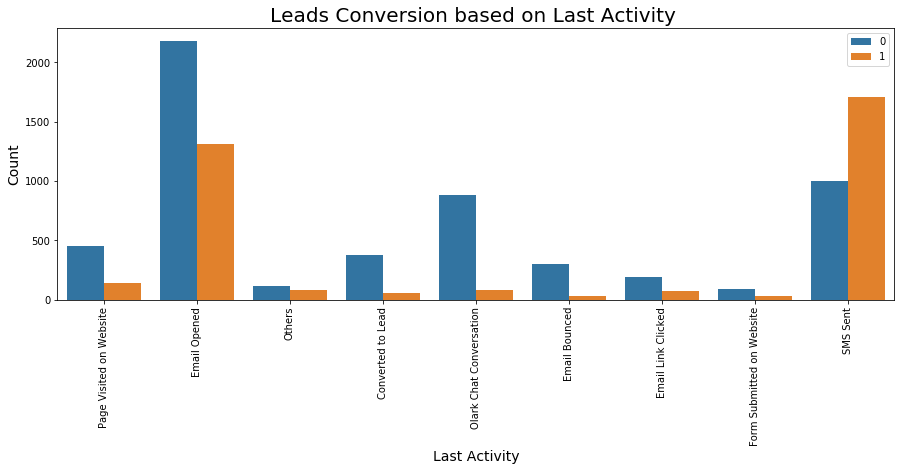

In [74]:
#Countplot on Last Activity variable

#Setting the frame
plt.figure(figsize=(15,5))

#Visualising using Countplot
count_plot=sns.countplot(leads_scoring['Last Activity'], hue=leads_scoring['Converted'])
count_plot.set_xticklabels(count_plot.get_xticklabels(),rotation=90)

#Formatting the plot
plt.title("Leads Conversion based on Last Activity ",fontsize=20)
plt.xlabel("Last Activity", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

#### Insights:
- 'Email Opened' has 30-35% conversion rate.
- 'SMS sent' has high number of conversion rate as compared to the count of leads who do not convert.

#### Leads Conversion based on Last Notable Activity

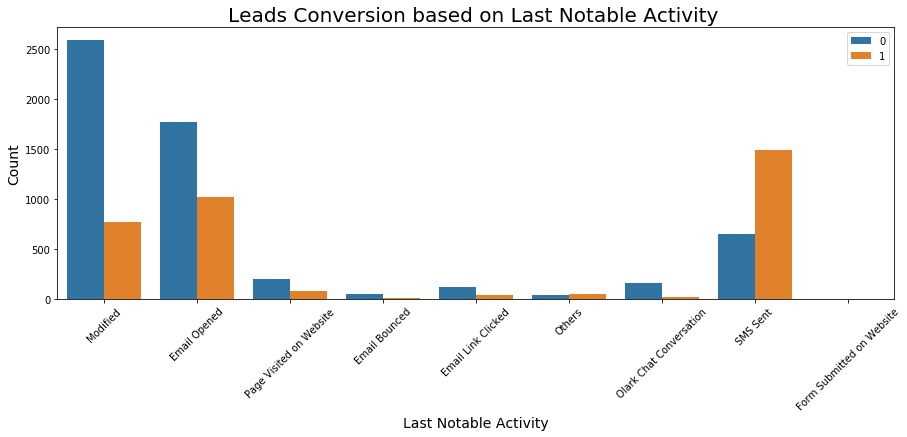

In [75]:
#Countplot on Last Notable variable

#Setting the frame
plt.figure(figsize=(15,5))

#Visualising using Countplot
count_plot=sns.countplot(leads_scoring['Last Notable Activity'], hue=leads_scoring['Converted'])
count_plot.set_xticklabels(count_plot.get_xticklabels(),rotation=45)

#Formatting the plot
plt.title("Leads Conversion based on Last Notable Activity ",fontsize=20)
plt.xlabel("Last Notable Activity", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

#### Insights:
- 'Email Opened' has 30-35% conversion rate.
- 'SMS sent' has high number of conversion rate as compared to the count of leads who do not convert.
- 'Modified' has very high number of leads who do not convert.

#### Leads Conversion based on Specialization

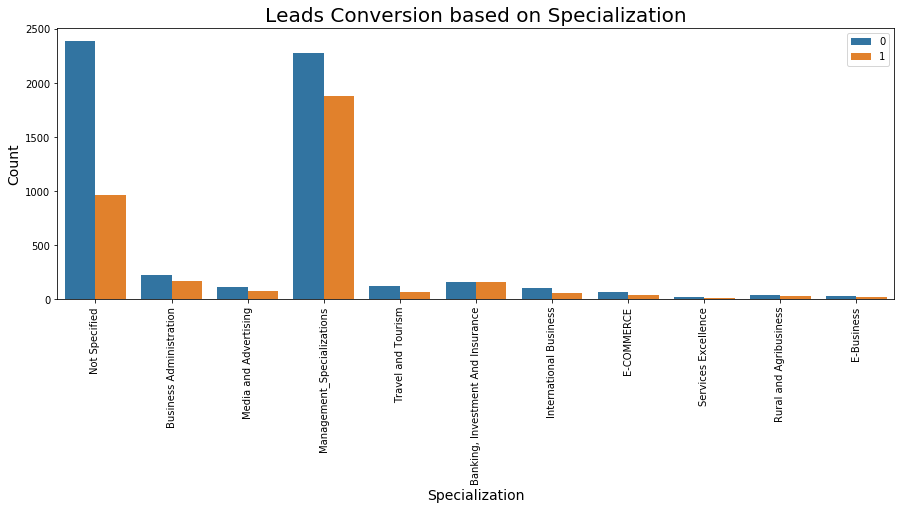

In [76]:
#Countplot on Specialization variable

#Setting the frame
plt.figure(figsize=(15,5))

#Visualising using Countplot
count_plot=sns.countplot(leads_scoring['Specialization'], hue=leads_scoring['Converted'])
count_plot.set_xticklabels(count_plot.get_xticklabels(),rotation=90)

#Formatting the plot
plt.title("Leads Conversion based on Specialization",fontsize=20)
plt.xlabel("Specialization", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

#### Insights:
- Focus should be more on the Specialization with high conversion rate such as leads with specialization in management field, banking, investment and insurance domain

#### Leads Conversion based on City

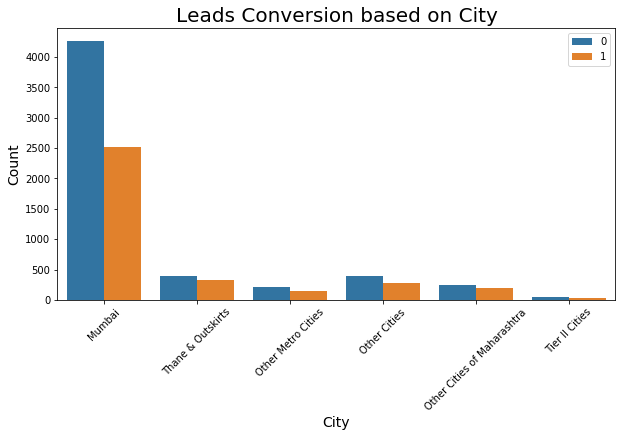

In [77]:
#Countplot on City variable

#Setting the frame
plt.figure(figsize=(10,5))

#Visualising using Countplot
count_plot=sns.countplot(leads_scoring['City'], hue=leads_scoring['Converted'])
count_plot.set_xticklabels(count_plot.get_xticklabels(),rotation=45)

#Formatting the plot
plt.title("Leads Conversion based on City",fontsize=20)
plt.xlabel("City", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

#### Insights:
- Most leads are from mumbai with around 30-35% conversion rate.

#### Leads Conversion based on A free copy of Mastering The Interview

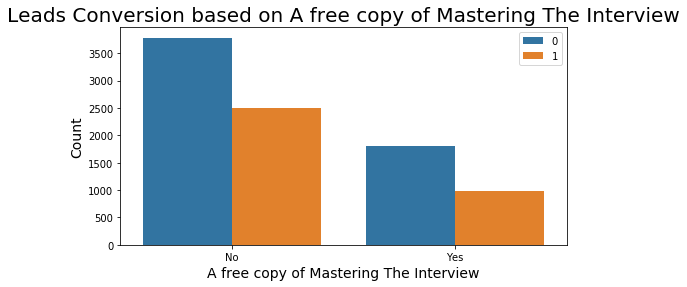

In [78]:
#Countplot on A free copy of Mastering The Interview variable

#Setting the frame
plt.figure(figsize=(8,4))

#Visualising using Countplot
count_plot=sns.countplot(leads_scoring['A free copy of Mastering The Interview'], hue=leads_scoring['Converted'])
count_plot.set_xticklabels(count_plot.get_xticklabels())

#Formatting the plot
plt.title("Leads Conversion based on A free copy of Mastering The Interview",fontsize=20)
plt.xlabel("A free copy of Mastering The Interview", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

#### Insights:
- Most entries are 'No'. So, no Inference can be drawn with this parameter.

### 3.1.3 Numerical Variables

'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'

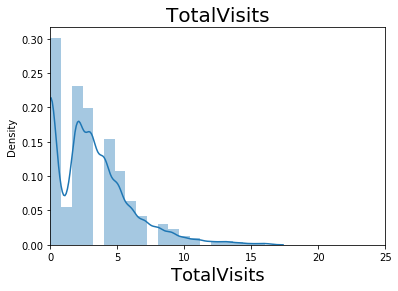

In [79]:
plt.figure()
sns.distplot(leads_scoring['TotalVisits'], bins = 20)
plt.xlim(0,25)
plt.title('TotalVisits', fontsize = 20)                  # Plot heading 
plt.xlabel('TotalVisits', fontsize = 18)                         # X-label
plt.show()

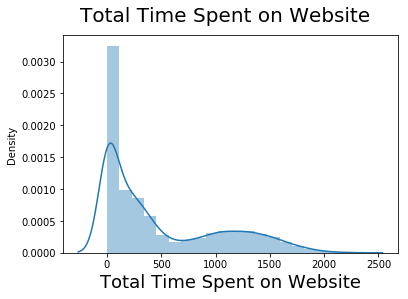

In [80]:
fig = plt.figure()
sns.distplot(leads_scoring['Total Time Spent on Website'], bins = 20)
fig.suptitle('Total Time Spent on Website', fontsize = 20)                  # Plot heading 
plt.xlabel('Total Time Spent on Website', fontsize = 18)                         # X-label
plt.show()

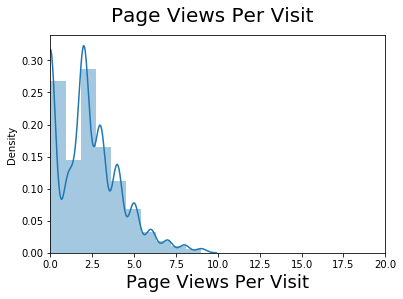

In [81]:
fig = plt.figure()
sns.distplot(leads_scoring['Page Views Per Visit'], bins = 10)
plt.xlim(0,20)
fig.suptitle('Page Views Per Visit', fontsize = 20)                  # Plot heading 
plt.xlabel('Page Views Per Visit', fontsize = 18)                         # X-label
plt.show()

### 3.1.4 Visualization of Numerical Variable based on Converted value (Target value)

#### Leads Conversion based on Total Visits

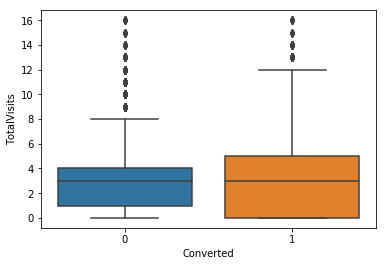

In [82]:
#Boxplot on TotalVisits variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_scoring)

#### Insights:
- Median for converted and not converted leads are the same.
- Nothng conclusive can be said on the basis of Total Visits.

#### Leads Conversion based on Total Time Spent on Website

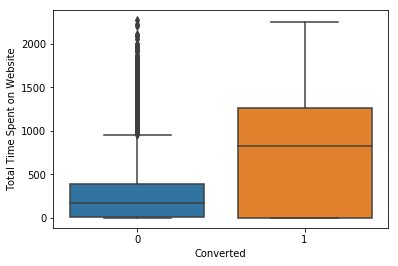

In [83]:
#Boxplot on Total Time Spent on Website variable
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_scoring)

#### Insights:
- Based on above boxplot analysis, Leads who are spending more time on the website tend to high chances of conversion.
- Website should be made more engaging to make leads spend more time.

#### Leads Conversion based on Page Views Per Visit

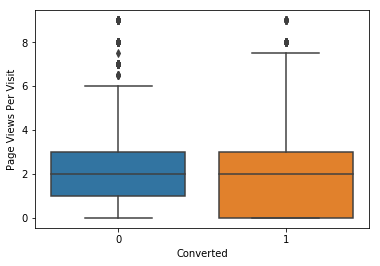

In [84]:
#Boxplot on Page Views Per Visit variable
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_scoring)

#### Insights:
- Median for converted and unconverted leads is the same.
- Nothing can be said specifically for lead conversion from Page Views Per Visit

### 3.2 Bivariate Analysis

### 3.2.1 Numerical Columns

<Figure size 1584x432 with 0 Axes>

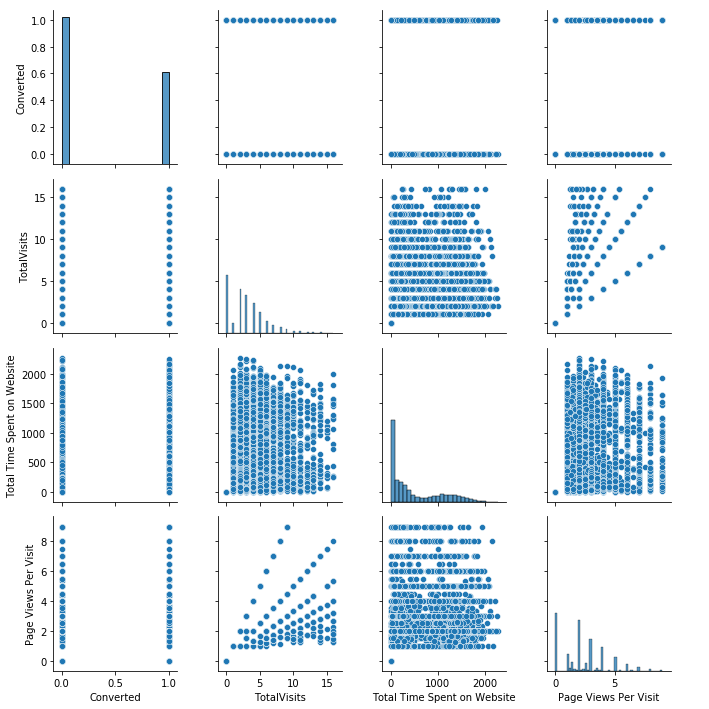

In [85]:
# we can use pair plot for this.
plt.figure(figsize=[22,6])
sns.pairplot(leads_scoring)
plt.show()

#### Insights:
- We can see that many column pairs are independent of each other i.e no insights can be drawn.

#### Correlation

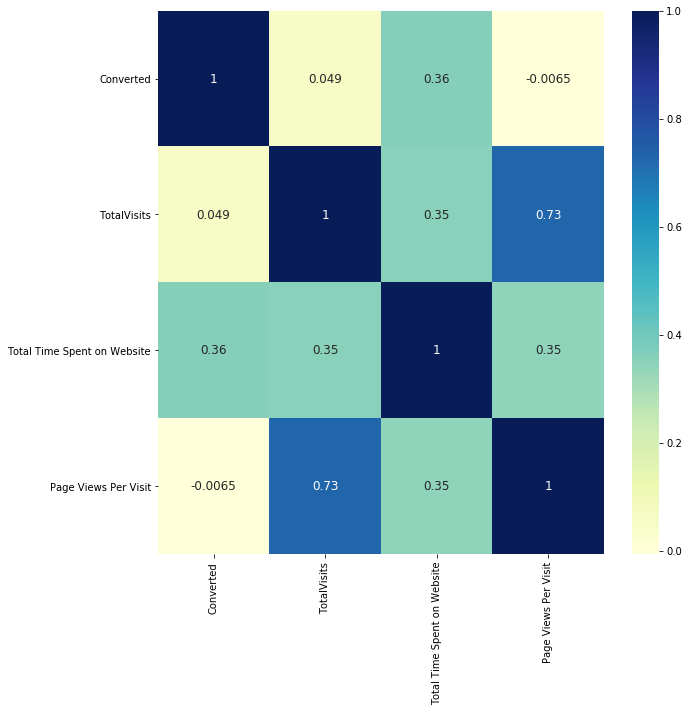

In [86]:
#Calculate Correlation
correlation = leads_scoring.corr()
plt.figure(figsize=(10,10))

#Draw Heatmap of correlation
sns.heatmap(correlation, annot=True, annot_kws={'size': 12}, cmap='YlGnBu' )
plt.show()

#### Insights:
- Numerical variables does not have strong correlation with target variable.

## Step 4: Data Modelling

### 4.1 Dummy variable creation for Logistic regression

In [87]:
dummy_df = pd.get_dummies(leads_scoring[['Lead Origin','Lead Source','Last Activity','Specialization',
                                         'What is your current occupation','Tags', 'City', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads_scoring_model = pd.concat([leads_scoring, dummy_df], axis=1)

In [88]:
dummy_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [89]:
# List of variables to map
varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the list
leads_scoring_model[varlist] = leads_scoring_model[varlist].apply(binary_map)

In [90]:
#Dropping the original columns
leads_scoring_model.drop(['Lead Origin','Lead Source','Last Activity','Specialization',
                          'What is your current occupation','Tags','City','Last Notable Activity'],axis=1,inplace=True)

In [91]:
leads_scoring_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 72 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9074 non-null   int64  
 1   TotalVisits                                           9074 non-null   float64
 2   Total Time Spent on Website                           9074 non-null   int64  
 3   Page Views Per Visit                                  9074 non-null   float64
 4   A free copy of Mastering The Interview                9074 non-null   int64  
 5   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 6   Lead Origin_Lead Add Form                             9074 non-null   uint8  
 7   Lead Origin_Lead Import                               9074 non-null   uint8  
 8   Lead Origin_Quick Add Form                            9074

In [92]:
leads_scoring_model.shape

(9074, 72)

In [93]:
leads_scoring_model.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


### 4.2 Test Train Split

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
# Putting feature variable to X
X = leads_scoring_model.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,...,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [96]:
# Putting target variable to y
y = leads_scoring_model['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [97]:
y.shape

(9074,)

In [98]:
# Missing values along columns
round(100*y.isnull().sum()/len(y.index),2)

0.0

### Splitting the data into train and test

In [99]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [100]:
# Checking the shape of Train and Test datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6351, 71)
(2723, 71)
(6351,)
(2723,)


### 4.3 Feature Scaling

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler()
X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,...,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2982,0.677283,1.793394,1.471322,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
996,-1.104583,-0.881818,-1.199095,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9226,-1.104583,-0.881818,-1.199095,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4722,1.746403,-0.572229,0.937239,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7983,-1.104583,-0.881818,-1.199095,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [103]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,...,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,6.351000e+03,6.351000e+03,6.351000e+03,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,...,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.00000
mean,5.593944e-18,-2.796972e-19,3.244487e-17,0.308140,0.522123,0.081877,0.005826,0.000157,0.313179,0.194300,...,0.082822,0.008818,0.019682,0.305779,0.000157,0.366084,0.019839,0.011179,0.031019,0.24012
std,1.000079e+00,1.000079e+00,1.000079e+00,0.461761,0.499550,0.274199,0.076111,0.012548,0.463823,0.395692,...,0.275634,0.093494,0.138916,0.460773,0.012548,0.481771,0.139459,0.105148,0.173382,0.42719
min,-1.104583e+00,-8.818176e-01,-1.199095e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,-7.482100e-01,-8.727121e-01,-6.650117e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,-3.546338e-02,-4.392877e-01,-1.309282e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,3.209099e-01,8.127260e-01,4.031552e-01,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
max,4.597390e+00,3.221145e+00,3.607656e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


### Looking at Correlations

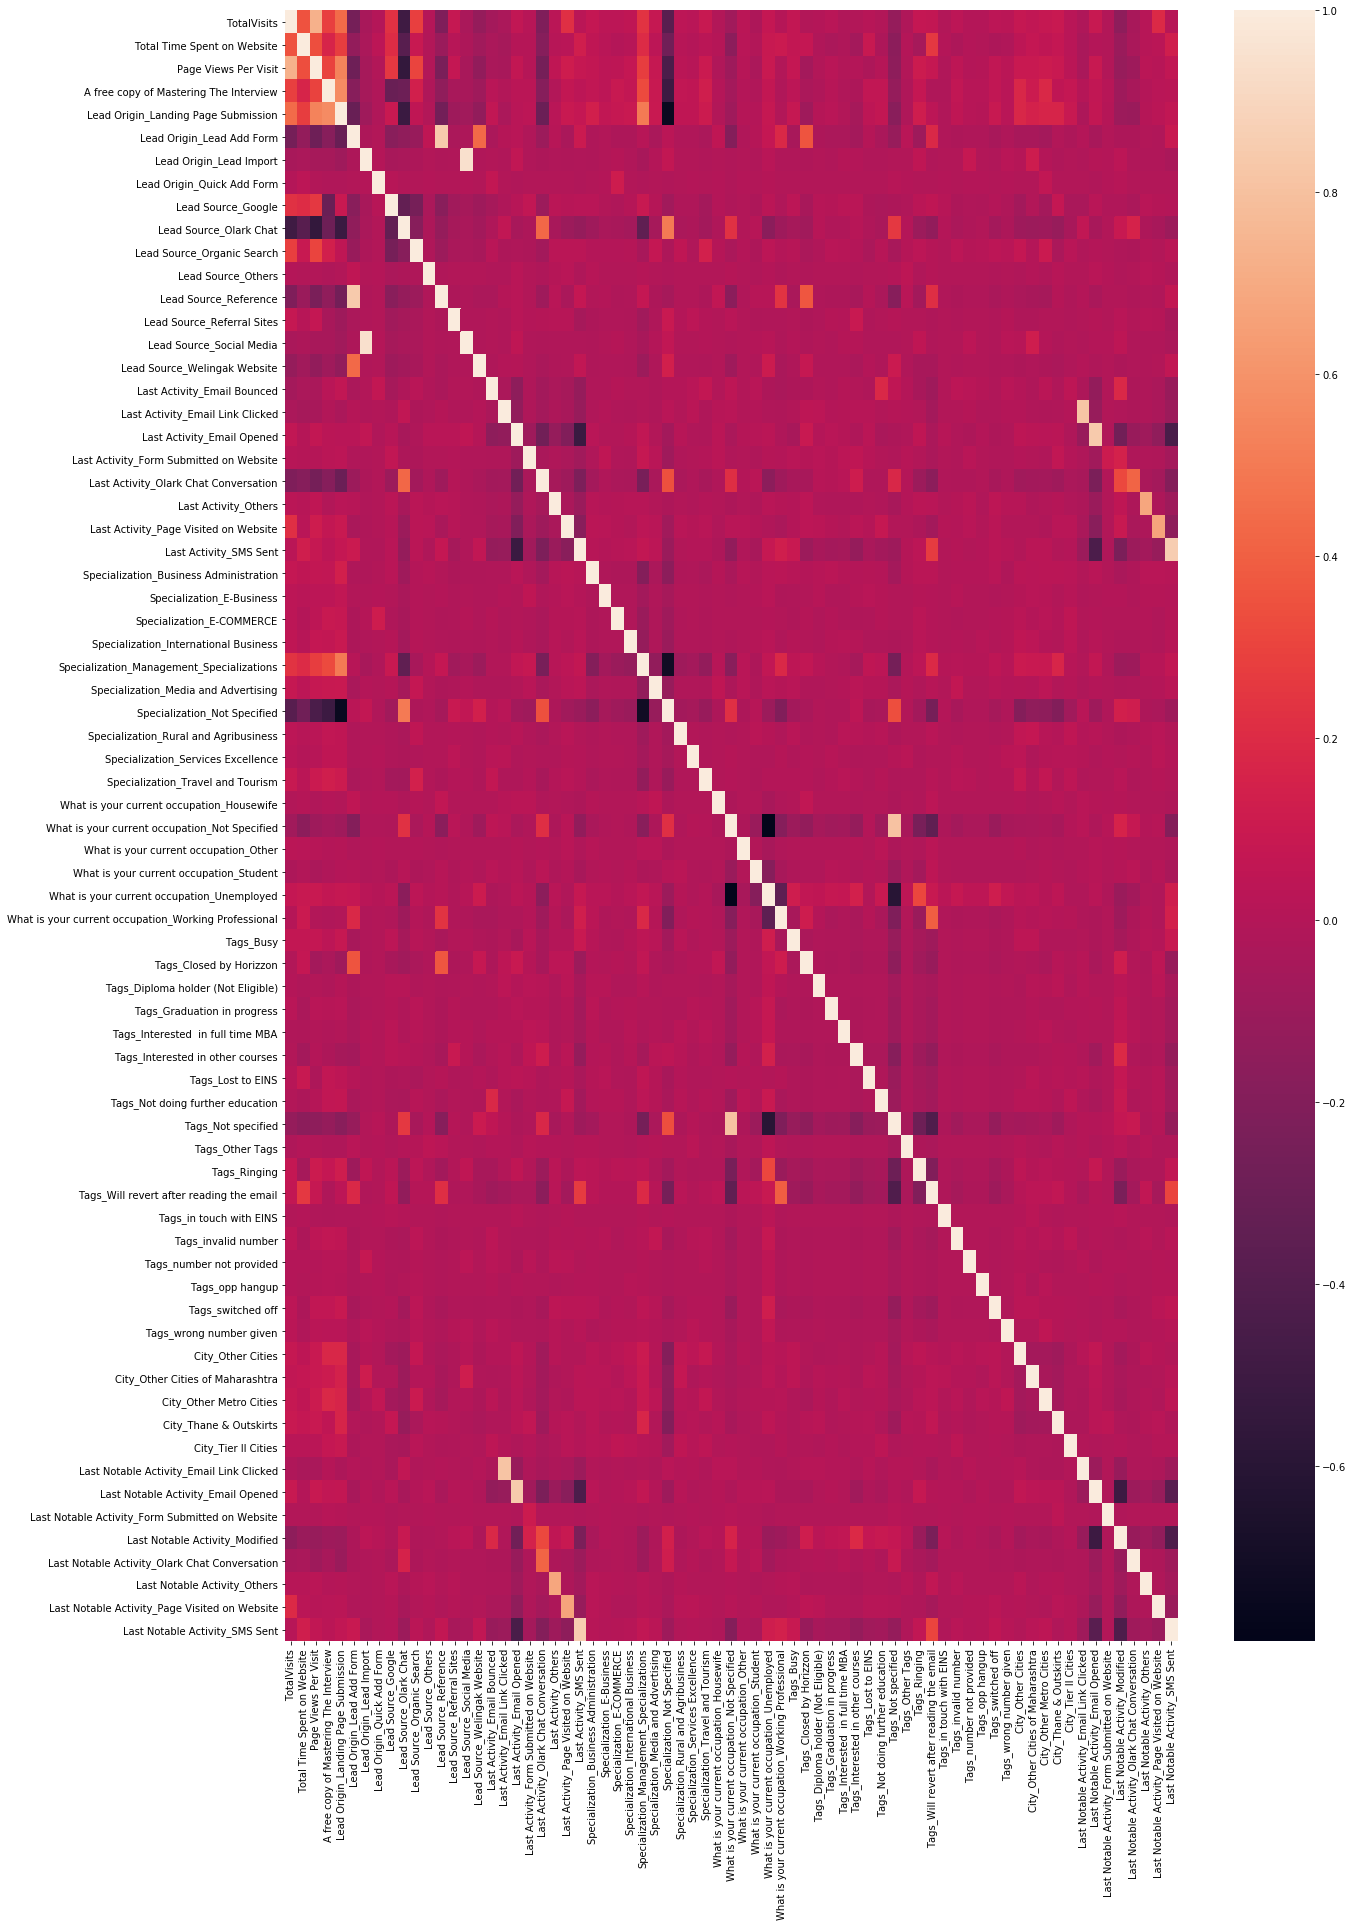

In [104]:
# Let's see the correlation matrix 

# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

## Step 5: Model Building

In [105]:
import statsmodels.api as sm

In [106]:
# Logistic regression model
log_m = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_m.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6279
Model Family:                Binomial   Df Model:                           71
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1026.4
Date:                Wed, 13 Oct 2021   Deviance:                       2052.7
Time:                        20:22:06   Pearson chi2:                 1.24e+04
No. Iterations:                    25                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                  -28.7080   1.83e+04     -0.002      0.999   -3.58e+04    3.58e+04
TotalVisits                                              0.2158      0.094      2.301      0.021       0.032       0.400
Total Time Spent on Website                              1.1068      0.069     15.926      0.000       0.971       1.243
Page Views Per Visit                                    -0.2031      0.102     -1.993      0.046      -0.403      -0.003
A free copy of Mastering The Interview                  -0.1538      0.200     -0.770      0.441      -0.545       0.238
Lead Origin_Landing Page Submission                     -0.3756      0.248     -1.513      0.130      -0.862       0.111
Lead Origin_Lead Add Form                                0.6631      0.797      0.832      0.406      -0.900       2.226
Lead Origin_Lead Import                                  0.9441      1.796      0.526      0.599      -2.575       4.464
Lead Origin_Quick Add Form                              24.5470   3.56e+05   6.89e-05      1.000   -6.98e+05    6.98e+05
Lead Source_Google                                       0.1188      0.206      0.577      0.564      -0.285       0.522
Lead Source_Olark Chat                                   0.9313      0.277      3.366      0.001       0.389       1.474
Lead Source_Organic Search                               0.1829      0.238      0.767      0.443      -0.284       0.650
Lead Source_Others                                       0.5882      1.088      0.541      0.589      -1.544       2.721
Lead Source_Reference                                   -0.0982      0.881     -0.111      0.911      -1.824       1.628
Lead Source_Referral Sites                              -0.1920      0.528     -0.364      0.716      -1.226       0.842
Lead Source_Social Media                                -1.4343      1.612     -0.890      0.373      -4.593       1.724
Lead Source_Welingak Website                             3.0182      1.086      2.778      0.005       0.889       5.148
Last Activity_Email Bounced                             -1.2521      0.650     -1.925      0.054      -2.527       0.022
Last Activity_Email Link Clicked                         1.2156      0.761      1.596      0.110      -0.277       2.708
Last Activity_Email Opened                               0.3715      0.444      0.837      0.402      -0.498       1.241
Last Activity_Form Submitted on Website                  0.3192      0.646      0.494      0.621      -0.947       1.585
Last Activity_Olark Chat Conversation                   -0.2455      0.451     -0.545      0.586      -1.129       0.638
Last Activity_Others                                    -0

### 5.1.1 Feature Selection Using RFE

In [107]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [108]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [109]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True])

In [110]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 34),
 ('Total Time Spent on Website', False, 9),
 ('Page Views Per Visit', False, 35),
 ('A free copy of Mastering The Interview', False, 33),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', False, 8),
 ('Lead Origin_Lead Import', False, 40),
 ('Lead Origin_Quick Add Form', False, 46),
 ('Lead Source_Google', False, 42),
 ('Lead Source_Olark Chat', False, 10),
 ('Lead Source_Organic Search', False, 41),
 ('Lead Source_Others', False, 39),
 ('Lead Source_Reference', False, 36),
 ('Lead Source_Referral Sites', False, 27),
 ('Lead Source_Social Media', False, 20),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 6),
 ('Last Activity_Email Link Clicked', False, 22),
 ('Last Activity_Email Opened', False, 23),
 ('Last Activity_Form Submitted on Website', False, 44),
 ('Last Activity_Olark Chat Conversation', False, 15),
 ('Last Activity_Others', False, 37),
 ('Last Activity_Page Visited on Website

In [111]:
col = X_train.columns[rfe.support_]

In [112]:
# Variables selected by RFE

X_train.columns[rfe.support_]

Index(['Lead Source_Welingak Website',
       'What is your current occupation_Not Specified', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Not specified',
       'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### The following columns are required for Building the model:

In [113]:
col

Index(['Lead Source_Welingak Website',
       'What is your current occupation_Not Specified', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Not specified',
       'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [114]:
X_train.shape

(6351, 71)

In [115]:
X_train[col].shape

(6351, 15)

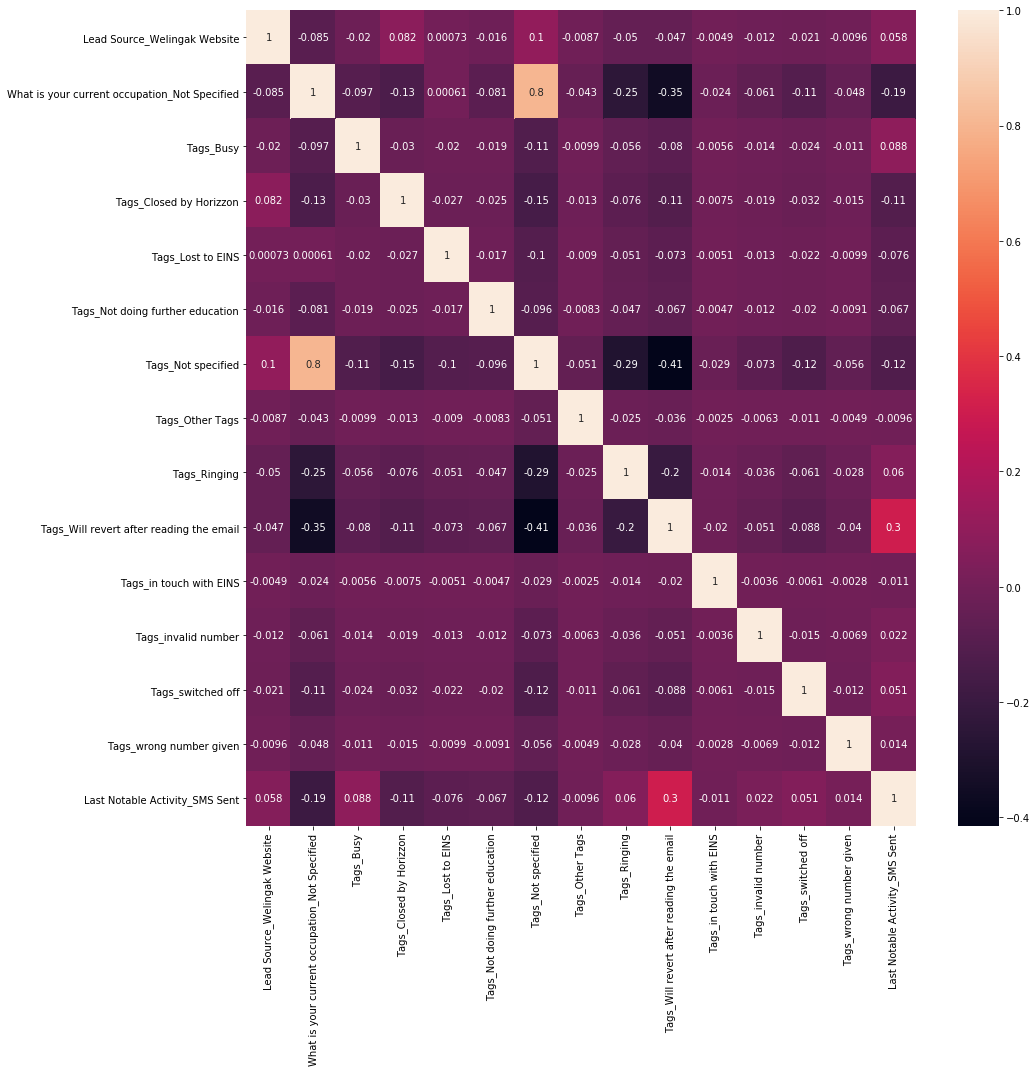

In [116]:
# To check the correlation among variables
plt.figure(figsize=(15,15))
sns.heatmap(X_train[col].corr(), annot = True)
plt.show()

Tags_Not Specified Variable has correlation value of 0.8 with What is your current occupation_Not Specified variable.

Let's look at the VIF values of this variable, if it's very high then will remove those columns.

### 5.1.2 Assessing the model with StatsModels

### 5.1 First Training Model

In [117]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1262.0
Date:                Wed, 13 Oct 2021   Deviance:                       2523.9
Time:                        20:22:20   Pearson chi2:                 1.13e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.3869      0.285    -15.410      0.000      -4.945      -3.829
Lead Source_Welingak Website                      2.9329      0.732      4.006      0.000       1.498       4.368
What is your current occupation_Not Specified    -2.6224      0.139    -18.871      0.000      -2.895      -2.350
Tags_Busy                                         3.5518      0.356      9.988      0.000       2.855       4.249
Tags_Closed by Horizzon                           9.8029      1.042      9.409      0.000       7.761      11.845
Tags_Lost to EINS                                 9.2134      0.607     15.170      0.000       8.023      10.404
Tags_Not doing further education                -21.2990   2.16e+04     -0.001      0.999   -4.23e+04    4.23e+04
Tags_Not specified                                4.4018      0.304     14.470      0.000       3.806       4.998
Tags_Other Tags                                   2.8525      0.564      5.054      0.000       1.746       3.959
Tags_Ringing                                     -0.8073      0.366     -2.203      0.028      -1.525      -0.089
Tags_Will revert after reading the email          7.1345      0.321     22.197      0.000       6.505       7.764
Tags_in touch with EINS                           3.3794      0.821      4.119      0.000       1.771       4.988
Tags_invalid number                              -1.4482      1.065     -1.360      0.174      -3.535       0.639
Tags_switched off                                -1.5030      0.662     -2.272      0.023      -2.800      -0.206
Tags_wrong number given                         -22.7687   3.31e+04     -0.001      0.999   -6.49e+04    6.49e+04
Last Notable Activity_SMS Sent                    2.8247      0.135     20.943      0.000       2.560       3.089
=================================================================================================================
"""

In [118]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.14
2,Tags_Busy,1.04
4,Tags_Lost to EINS,1.03
12,Tags_switched off,1.02
3,Tags_Closed by Horizzon,1.01
11,Tags_invalid number,1.01
5,Tags_Not doing further education,1.00
7,Tags_Other Tags,1.00
10,Tags_in touch with EINS,1.00
13,Tags_wrong number given,1.00


In [120]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2982    0.996213
996     0.068663
9226    0.005518
4722    0.012286
7983    0.068663
1255    0.012286
2856    0.939777
4938    0.554106
7523    0.939777
1224    0.068663
dtype: float64

In [121]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.9962126 , 0.06866275, 0.00551799, 0.01228639, 0.06866275,
       0.01228639, 0.93977715, 0.55410644, 0.93977715, 0.06866275])

In [122]:
#Creating a dataframe with the original 'Converted' flag and the 'Predicted_Conversion' flag value also calculating 'Converted_Prob', 'Lead_Score' & 'CustID'
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead_Score']=round((y_train_pred_final['Converted_Prob']*100))
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head() 

,Converted,Converted_Prob,Lead_Score,CustID
0,1,0.996213,100.0,2982
1,0,0.068663,7.0,996
2,0,0.005518,1.0,9226
3,0,0.012286,1.0,4722
4,0,0.068663,7.0,7983


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [123]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Score,CustID,predicted
0,1,0.996213,100.0,2982,1
1,0,0.068663,7.0,996,0
2,0,0.005518,1.0,9226,0
3,0,0.012286,1.0,4722,0
4,0,0.068663,7.0,7983,0


In [124]:
from sklearn import metrics

In [125]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3569  310]
 [ 174 2298]]


In [126]:
# Predicted     not_churn    churn
# Actual
# not_churn        3569      310
# churn            174       2298  

In [127]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9237915288930877


### Manual Feature Elimination:

- We can see some variables with high p-values (>=0.05), they need to be removed from the model.
- We also need to check for VIF values which indicates correlation between predictor variables. Variables with high VIF(>=5) are required to be removed from the model.

### 5.2 Second Training Model

In [128]:
#Dropping 'Tags_Not doing further education' due to high p-value(0.999)
col = col.drop('Tags_Not doing further education', 1)
col

Index(['Lead Source_Welingak Website',
       'What is your current occupation_Not Specified', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not specified',
       'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### 5.2.1 Assessing the model with StatsModels

In [129]:
##Running the model again using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.3
Date:                Wed, 13 Oct 2021   Deviance:                       2526.5
Time:                        20:22:22   Pearson chi2:                 1.14e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.4904      0.284    -15.810      0.000      -5.047      -3.934
Lead Source_Welingak Website                      2.9329      0.732      4.006      0.000       1.498       4.368
What is your current occupation_Not Specified    -2.6226      0.139    -18.870      0.000      -2.895      -2.350
Tags_Busy                                         3.6550      0.355     10.292      0.000       2.959       4.351
Tags_Closed by Horizzon                           9.9063      1.042      9.510      0.000       7.865      11.948
Tags_Lost to EINS                                 9.3170      0.607     15.348      0.000       8.127      10.507
Tags_Not specified                                4.5052      0.304     14.840      0.000       3.910       5.100
Tags_Other Tags                                   2.9558      0.564      5.240      0.000       1.850       4.061
Tags_Ringing                                     -0.7047      0.366     -1.926      0.054      -1.422       0.013
Tags_Will revert after reading the email          7.2379      0.321     22.560      0.000       6.609       7.867
Tags_in touch with EINS                           3.4828      0.820      4.246      0.000       1.875       5.091
Tags_invalid number                              -1.3457      1.065     -1.264      0.206      -3.432       0.741
Tags_switched off                                -1.4004      0.661     -2.118      0.034      -2.697      -0.104
Tags_wrong number given                         -20.6661   1.22e+04     -0.002      0.999   -2.39e+04    2.39e+04
Last Notable Activity_SMS Sent                    2.8257      0.135     20.947      0.000       2.561       3.090
=================================================================================================================
"""

#### 5.2.2 Calculate VIFs

In [130]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.14
2,Tags_Busy,1.04
4,Tags_Lost to EINS,1.03
11,Tags_switched off,1.02
3,Tags_Closed by Horizzon,1.01
10,Tags_invalid number,1.01
6,Tags_Other Tags,1.00
9,Tags_in touch with EINS,1.00
12,Tags_wrong number given,1.00
13,Last Notable Activity_SMS Sent,0.26


### 5.3 Third Training Model

In [131]:
#Dropping 'Tags_wrong number given' based on high p-value(0.999)
col = col.drop('Tags_wrong number given', 1)
col

Index(['Lead Source_Welingak Website',
       'What is your current occupation_Not Specified', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not specified',
       'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_switched off',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### 5.3.1 Assessing the model with StatsModels

In [132]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1265.3
Date:                Wed, 13 Oct 2021   Deviance:                       2530.5
Time:                        20:22:22   Pearson chi2:                 1.13e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.6357      0.286    -16.202      0.000      -5.196      -4.075
Lead Source_Welingak Website                      2.9323      0.732      4.006      0.000       1.498       4.367
What is your current occupation_Not Specified    -2.6173      0.139    -18.876      0.000      -2.889      -2.346
Tags_Busy                                         3.8076      0.355     10.725      0.000       3.112       4.503
Tags_Closed by Horizzon                          10.0517      1.042      9.644      0.000       8.009      12.094
Tags_Lost to EINS                                 9.4580      0.608     15.546      0.000       8.266      10.650
Tags_Not specified                                4.6527      0.305     15.254      0.000       4.055       5.251
Tags_Other Tags                                   3.1056      0.564      5.509      0.000       2.001       4.210
Tags_Ringing                                     -0.5403      0.364     -1.486      0.137      -1.253       0.172
Tags_Will revert after reading the email          7.3845      0.322     22.906      0.000       6.753       8.016
Tags_in touch with EINS                           3.6297      0.820      4.425      0.000       2.022       5.237
Tags_invalid number                              -1.1807      1.064     -1.110      0.267      -3.266       0.904
Tags_switched off                                -1.2352      0.660     -1.872      0.061      -2.528       0.058
Last Notable Activity_SMS Sent                    2.8036      0.134     20.967      0.000       2.542       3.066
=================================================================================================================
"""

#### 5.3.2 Checking VIFs

In [133]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.14
2,Tags_Busy,1.03
4,Tags_Lost to EINS,1.03
11,Tags_switched off,1.02
3,Tags_Closed by Horizzon,1.01
10,Tags_invalid number,1.01
6,Tags_Other Tags,1.00
9,Tags_in touch with EINS,1.00
12,Last Notable Activity_SMS Sent,0.26
1,What is your current occupation_Not Specified,0.22


### 5.4 Fourth Training Model

In [134]:
#Dropping 'Tags_invalid number' due to high p-value(0.267)
col = col.drop('Tags_invalid number', 1)
col

Index(['Lead Source_Welingak Website',
       'What is your current occupation_Not Specified', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not specified',
       'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_switched off', 'Last Notable Activity_SMS Sent'],
      dtype='object')

#### 5.4.1 Assessing the model with StatsModels

In [135]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1266.1
Date:                Wed, 13 Oct 2021   Deviance:                       2532.2
Time:                        20:22:23   Pearson chi2:                 1.13e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.7693      0.279    -17.095      0.000      -5.316      -4.222
Lead Source_Welingak Website                      2.9318      0.732      4.005      0.000       1.497       4.366
What is your current occupation_Not Specified    -2.6131      0.138    -18.882      0.000      -2.884      -2.342
Tags_Busy                                         3.9470      0.347     11.369      0.000       3.267       4.627
Tags_Closed by Horizzon                          10.1853      1.040      9.791      0.000       8.146      12.224
Tags_Lost to EINS                                 9.5881      0.606     15.833      0.000       8.401      10.775
Tags_Not specified                                4.7880      0.298     16.085      0.000       4.205       5.371
Tags_Other Tags                                   3.2427      0.559      5.804      0.000       2.148       4.338
Tags_Ringing                                     -0.3915      0.353     -1.109      0.268      -1.084       0.301
Tags_Will revert after reading the email          7.5192      0.316     23.817      0.000       6.900       8.138
Tags_in touch with EINS                           3.7646      0.817      4.607      0.000       2.163       5.366
Tags_switched off                                -1.0857      0.654     -1.660      0.097      -2.368       0.196
Last Notable Activity_SMS Sent                    2.7859      0.133     21.003      0.000       2.526       3.046
=================================================================================================================
"""

#### 5.4.2 Calculating VIFs

In [136]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.14
2,Tags_Busy,1.03
4,Tags_Lost to EINS,1.03
10,Tags_switched off,1.02
3,Tags_Closed by Horizzon,1.01
6,Tags_Other Tags,1.00
9,Tags_in touch with EINS,1.00
11,Last Notable Activity_SMS Sent,0.25
1,What is your current occupation_Not Specified,0.22
8,Tags_Will revert after reading the email,0.14


### 5.5 Fifth Training Model

In [137]:
#Dropping 'Tags_Ringing' due to high p-value(0.268)
col = col.drop('Tags_Ringing', 1)
col

Index(['Lead Source_Welingak Website',
       'What is your current occupation_Not Specified', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not specified',
       'Tags_Other Tags', 'Tags_Will revert after reading the email',
       'Tags_in touch with EINS', 'Tags_switched off',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### 5.5.1 Assessing the model with StatsModels

In [138]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1266.7
Date:                Wed, 13 Oct 2021   Deviance:                       2533.4
Time:                        20:22:23   Pearson chi2:                 1.12e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -5.0117      0.192    -26.078      0.000      -5.388      -4.635
Lead Source_Welingak Website                      2.9312      0.732      4.005      0.000       1.497       4.366
What is your current occupation_Not Specified    -2.6072      0.138    -18.894      0.000      -2.878      -2.337
Tags_Busy                                         4.1978      0.275     15.272      0.000       3.659       4.737
Tags_Closed by Horizzon                          10.4277      1.020     10.219      0.000       8.428      12.428
Tags_Lost to EINS                                 9.8256      0.573     17.161      0.000       8.703      10.948
Tags_Not specified                                5.0330      0.216     23.334      0.000       4.610       5.456
Tags_Other Tags                                   3.4903      0.517      6.746      0.000       2.476       4.504
Tags_Will revert after reading the email          7.7632      0.241     32.220      0.000       7.291       8.235
Tags_in touch with EINS                           4.0089      0.790      5.072      0.000       2.460       5.558
Tags_switched off                                -0.8204      0.613     -1.338      0.181      -2.023       0.382
Last Notable Activity_SMS Sent                    2.7605      0.131     21.150      0.000       2.505       3.016
=================================================================================================================
"""

#### 5.5.2 Calculating VIFs

In [139]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.13
2,Tags_Busy,1.03
4,Tags_Lost to EINS,1.03
9,Tags_switched off,1.02
3,Tags_Closed by Horizzon,1.01
6,Tags_Other Tags,1.00
8,Tags_in touch with EINS,1.00
10,Last Notable Activity_SMS Sent,0.24
1,What is your current occupation_Not Specified,0.22
7,Tags_Will revert after reading the email,0.14


### 5.6 Sixth Training Model

In [140]:
#Dropping 'Tags_switched off' due to high p-value(0.181)
col = col.drop('Tags_switched off', 1)
col

Index(['Lead Source_Welingak Website',
       'What is your current occupation_Not Specified', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not specified',
       'Tags_Other Tags', 'Tags_Will revert after reading the email',
       'Tags_in touch with EINS', 'Last Notable Activity_SMS Sent'],
      dtype='object')

#### 5.6.1 Assessing the model with StatsModels

In [141]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1267.8
Date:                Wed, 13 Oct 2021   Deviance:                       2535.6
Time:                        20:22:24   Pearson chi2:                 1.08e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -5.0927      0.188    -27.063      0.000      -5.462      -4.724
Lead Source_Welingak Website                      2.9309      0.732      4.005      0.000       1.497       4.365
What is your current occupation_Not Specified    -2.6051      0.138    -18.894      0.000      -2.875      -2.335
Tags_Busy                                         4.2819      0.271     15.782      0.000       3.750       4.814
Tags_Closed by Horizzon                          10.5087      1.020     10.305      0.000       8.510      12.507
Tags_Lost to EINS                                 9.9048      0.571     17.337      0.000       8.785      11.025
Tags_Not specified                                5.1149      0.212     24.143      0.000       4.700       5.530
Tags_Other Tags                                   3.5732      0.515      6.933      0.000       2.563       4.583
Tags_Will revert after reading the email          7.8447      0.238     33.014      0.000       7.379       8.310
Tags_in touch with EINS                           4.0905      0.789      5.184      0.000       2.544       5.637
Last Notable Activity_SMS Sent                    2.7513      0.131     21.082      0.000       2.496       3.007
=================================================================================================================
"""

#### 5.6.2 Calculating VIFs

In [142]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.13
2,Tags_Busy,1.03
4,Tags_Lost to EINS,1.03
3,Tags_Closed by Horizzon,1.01
6,Tags_Other Tags,1.00
8,Tags_in touch with EINS,1.00
9,Last Notable Activity_SMS Sent,0.23
1,What is your current occupation_Not Specified,0.22
7,Tags_Will revert after reading the email,0.14
5,Tags_Not specified,0.12


## Step 6: Model Evaluation

In [143]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.9959433 , 0.07025045, 0.00610401, 0.00610401, 0.07025045,
       0.00610401, 0.94002782, 0.54201183, 0.94002782, 0.07025045])

In [144]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead_Score']=round((y_train_pred_final['Converted_Prob']*100))
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head() 

,Converted,Converted_Prob,Lead_Score,CustID
0,1,0.995943,100.0,2982
1,0,0.070250,7.0,996
2,0,0.006104,1.0,9226
3,0,0.006104,1.0,4722
4,0,0.070250,7.0,7983


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [145]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Score,CustID,predicted
0,1,0.995943,100.0,2982,1
1,0,0.070250,7.0,996,0
2,0,0.006104,1.0,9226,0
3,0,0.006104,1.0,4722,0
4,0,0.070250,7.0,7983,0


In [146]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9237915288930877


#### Now all the variables are within critical VIF limit of <5 and p value of <0.05. Hence it is a good model with accuracy of ~92.37%.

### 6.1 Metrics beyond simply accuracy

In [147]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3569  310]
 [ 174 2298]]


In [148]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [149]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9296116504854369

In [150]:
# Let us calculate specificity
TN / float(TN+FP)

0.9200824954885279

In [151]:
# Calculate false postive rate - predicting converted when customer have not converted
print(FP/ float(TN+FP))

0.07991750451147203


In [152]:
# positive predictive value 
print (TP / float(TP+FP))

0.8811349693251533


In [153]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9535132246860807


### Observations on Train Data

After running the model on the Train Data and making predictions, we obtain below metrics:

- Accuracy : 92.37%
- Sensitivity : 92.96%
- Specificity : 92.0%
- False Positive Rate : 7.99%
- Positive Predictive Value : 88.11%
- Negative Predictive Value : 95.35%

### 6.2 Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [154]:
#Function to plot ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [155]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

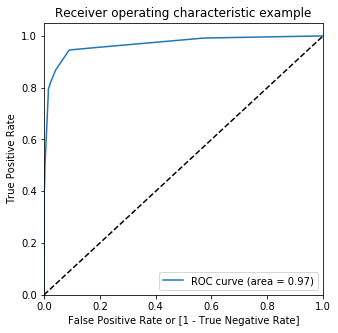

In [156]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Observation:
#### So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. 

### 6.3 Optimal cutoff point

We need find the probability at which Accuracy, Specificity, Sensitivity converge in a plot. It ensures the balance between three metrics so that we can maximize the performance of our model.

In [157]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Score,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.995943,100.0,2982,1,1,1,1,1,1,1,1,1,1,1
1,0,0.070250,7.0,996,0,1,0,0,0,0,0,0,0,0,0
2,0,0.006104,1.0,9226,0,1,0,0,0,0,0,0,0,0,0
3,0,0.006104,1.0,4722,0,1,0,0,0,0,0,0,0,0,0
4,0,0.070250,7.0,7983,0,1,0,0,0,0,0,0,0,0,0


In [158]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.389230  1.000000  0.000000
0.1   0.1  0.920800  0.946197  0.904615
0.2   0.2  0.923477  0.944984  0.909771
0.3   0.3  0.924106  0.944175  0.911317
0.4   0.4  0.923792  0.929612  0.920082
0.5   0.5  0.923792  0.929612  0.920082
0.6   0.6  0.914974  0.814725  0.978861
0.7   0.7  0.914974  0.814725  0.978861
0.8   0.8  0.914187  0.812702  0.978861
0.9   0.9  0.910565  0.794094  0.984790


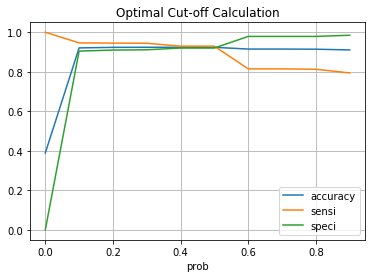

In [159]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title('Optimal Cut-off Calculation')
plt.grid()
plt.show()

#### Conclusion: From the curve above, ~0.5 is the optimum point to take it as a cutoff probability.

In [160]:
cutoff_df['var'] = np.var([cutoff_df.accuracy, cutoff_df.sensi, cutoff_df.speci], axis=0)
cutoff_value = cutoff_df.sort_values('var').head(1)['prob'].values[0]
print(f"Optimum cut-off value is: {cutoff_value}")

Optimum cut-off value is: 0.4


In [161]:
y_train_pred_final['Predicted_Conversion'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Score,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_Conversion
0,1,0.995943,100.0,2982,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.070250,7.0,996,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.006104,1.0,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.006104,1.0,4722,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.070250,7.0,7983,0,1,0,0,0,0,0,0,0,0,0,0


In [162]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion)

0.9237915288930877

In [163]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_Conversion )
confusion2

array([[3569,  310],
       [ 174, 2298]], dtype=int64)

In [164]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [165]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9296116504854369

In [166]:
# Let us calculate specificity
TN / float(TN+FP)

0.9200824954885279

In [167]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07991750451147203


In [168]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8811349693251533


In [169]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9535132246860807


### 6.4 Precision and Recall

In [170]:
from sklearn.metrics import precision_score, recall_score

In [171]:
#Checking precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8811349693251533

In [172]:
#Calculating recall score
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9296116504854369

### Observations on Train Data

After applying optimum cut-off condition to probability values, we obtain below metrics

- Accuracy : 92.37%
- Sensitivity : 92.96%
- Specificity : 92.0%
- False Positive Rate : 7.99%
- Positive Predictive Value : 88.11%
- Negative Predictive Value : 95.35%
- Precision : 88.11%
- Recall : 92.96%

### 6.5 Precision and Recall Tradeoff

In [173]:
from sklearn.metrics import precision_recall_curve

In [174]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [175]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

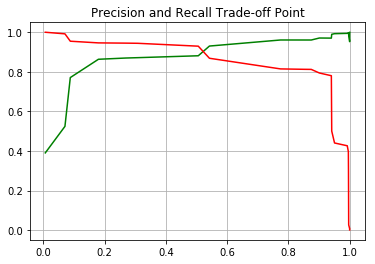

In [176]:
#Plotting precision and recall trade-off point
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision and Recall Trade-off Point')
plt.grid()
plt.show()

In [177]:
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Score,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_Conversion
0,1,0.995943,100.0,2982,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.070250,7.0,996,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.006104,1.0,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.006104,1.0,4722,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.070250,7.0,7983,0,1,0,0,0,0,0,0,0,0,0,0


## Step 7: Making predictions on the test set

In [178]:
X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.transform(X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])

In [179]:
X_train[col]

,Lead Source_Welingak Website,What is your current occupation_Not Specified,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not specified,Tags_Other Tags,Tags_Will revert after reading the email,Tags_in touch with EINS,Last Notable Activity_SMS Sent
2982,0,0,0,0,0,0,0,1,0,1
996,0,1,0,0,0,1,0,0,0,0
9226,0,0,0,0,0,0,0,0,0,0
4722,0,0,0,0,0,0,0,0,0,0
7983,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
362,0,1,0,0,0,1,0,0,0,0
82,0,0,0,0,0,0,0,1,0,0
8185,0,0,0,0,0,1,0,0,0,0
7059,0,0,0,0,0,0,0,0,0,0


In [180]:
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,What is your current occupation_Not Specified,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not specified,Tags_Other Tags,Tags_Will revert after reading the email,Tags_in touch with EINS,Last Notable Activity_SMS Sent
3241,0,0,0,0,0,0,0,1,0,1
1467,0,0,0,0,0,0,0,1,0,1
7932,0,0,0,0,0,0,0,0,0,0
4187,0,0,0,0,0,0,0,1,0,1
3800,0,1,0,0,0,1,0,0,0,0


In [181]:
#Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

In [182]:
#Check X_test_sm
X_test_sm

,const,Lead Source_Welingak Website,What is your current occupation_Not Specified,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not specified,Tags_Other Tags,Tags_Will revert after reading the email,Tags_in touch with EINS,Last Notable Activity_SMS Sent
3241,1.0,0,0,0,0,0,0,0,1,0,1
1467,1.0,0,0,0,0,0,0,0,1,0,1
7932,1.0,0,0,0,0,0,0,0,0,0,0
4187,1.0,0,0,0,0,0,0,0,1,0,1
3800,1.0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
833,1.0,0,0,0,0,0,0,0,0,0,0
2855,1.0,0,0,1,0,0,0,0,0,0,0
6484,1.0,0,0,0,0,0,0,0,1,0,0
7138,1.0,0,0,0,0,0,0,0,0,0,0


In [183]:
# Missing values along columns
round(100*X_test_sm.isnull().sum()/len(X_test_sm.index),2).sort_values(ascending=False)

Last Notable Activity_SMS Sent                   0.0
Tags_in touch with EINS                          0.0
Tags_Will revert after reading the email         0.0
Tags_Other Tags                                  0.0
Tags_Not specified                               0.0
Tags_Lost to EINS                                0.0
Tags_Closed by Horizzon                          0.0
Tags_Busy                                        0.0
What is your current occupation_Not Specified    0.0
Lead Source_Welingak Website                     0.0
const                                            0.0
dtype: float64

In [184]:
X_test_sm.shape

(2723, 11)

In [185]:
#Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [186]:
y_test_pred[:10]

3241    0.995943
1467    0.995943
7932    0.006104
4187    0.995943
3800    0.070250
1776    0.000454
6490    0.006104
4792    0.006104
4194    0.995575
4685    0.070250
dtype: float64

In [187]:
#Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_test_pred)

In [188]:
y_pred_df.head()

,0
3241,0.995943
1467,0.995943
7932,0.006104
4187,0.995943
3800,0.070250


In [189]:
#Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [190]:
y_test_df.head()

,Converted
3241,1
1467,1
7932,0
4187,1
3800,1


In [191]:
#Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [192]:
#Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [193]:
y_pred_final.head()

,Converted,0
0,1,0.995943
1,1,0.995943
2,0,0.006104
3,1,0.995943
4,1,0.070250


In [194]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Probability'})

In [195]:
y_pred_final.head()

,Converted,Converted_Probability
0,1,0.995943
1,1,0.995943
2,0,0.006104
3,1,0.995943
4,1,0.070250


In [196]:
print(y_pred_final.dtypes)

Converted                  int64
Converted_Probability    float64
dtype: object


In [197]:
y_pred_final['Predicted_Conversion'] = y_pred_final.Converted_Probability.map(lambda x: 1 if x > 0.5 else 0)

In [198]:
y_pred_final['Lead_Score'] =round(y_pred_final['Converted_Probability']*100)

In [199]:
y_pred_final.head()

,Converted,Converted_Probability,Predicted_Conversion,Lead_Score
0,1,0.995943,1,100.0
1,1,0.995943,1,100.0
2,0,0.006104,0,1.0
3,1,0.995943,1,100.0
4,1,0.070250,0,7.0


In [200]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Predicted_Conversion)

0.9239809034153507

In [201]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Predicted_Conversion)
confusion3

array([[1580,  122],
       [  85,  936]], dtype=int64)

In [202]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [203]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9167482859941234

In [204]:
# Let us calculate specificity
TN / float(TN+FP)

0.9283196239717979

### Observations on Test Data

After running the model on the Test Data these are the figures we obtain:

Accuracy : 92.39%
Sensitivity : 91.67%
Specificity : 92.83%

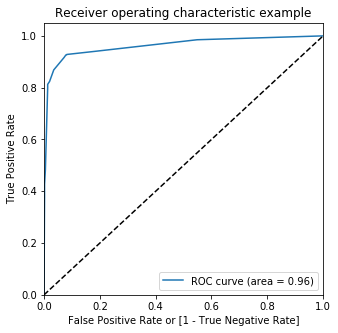

In [205]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_Probability)

In [206]:
precision_score(y_pred_final.Converted, y_pred_final.Predicted_Conversion)

0.8846880907372401

In [207]:
recall_score(y_pred_final.Converted, y_pred_final.Predicted_Conversion)

0.9167482859941234

## Final Observation:
Let us compare the values obtained for Train & Test:

### Train Data: 
- Accuracy : 92.37%
- Sensitivity : 92.96%
- Specificity : 92.0%
- Precision : 88.11%
- Recall : 92.96%

### Test Data: 
- Accuracy : 92.39%
- Sensitivity : 91.67%
- Specificity : 92.83%
- Precision : 88.46%
- Recall : 91.67%

## Step 8: Checking Conversion %

In [208]:
# Checking predictions of train data
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Score,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_Conversion
0,1,0.995943,100.0,2982,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.070250,7.0,996,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.006104,1.0,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.006104,1.0,4722,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.070250,7.0,7983,0,1,0,0,0,0,0,0,0,0,0,0


In [209]:
# Creating dataframe with train data predictions and lead score
df_train=y_train_pred_final[['Converted','Lead_Score','Predicted_Conversion']]

In [210]:
df_train.head()

,Converted,Lead_Score,Predicted_Conversion
0,1,100.0,1
1,0,7.0,0
2,0,1.0,0
3,0,1.0,0
4,0,7.0,0


In [211]:
# Creating dataframe with test data predictions and lead score
df_test=y_pred_final[['Converted','Lead_Score','Predicted_Conversion']]

In [212]:
df_train.shape

(6351, 3)

In [213]:
df_test.shape

(2723, 3)

In [214]:
# Concatinating dataframes of train and test data predictions

df=pd.concat([df_train,df_test])

In [215]:
df.shape

(9074, 3)

In [216]:
df.head()

,Converted,Lead_Score,Predicted_Conversion
0,1,100.0,1
1,0,7.0,0
2,0,1.0,0
3,0,1.0,0
4,0,7.0,0


In [217]:
# As we did predictions based on optimal cut-off of 0.5, we'll use 50 as optimal lead score cut-off as 50
df_optimal_conversion=df[df['Lead_Score']>= 50]

In [218]:
df_optimal_conversion.shape

(3666, 3)

In [219]:
conversion_rate=round(100*(df_optimal_conversion['Converted'].sum()/len(df_optimal_conversion.index)))

In [220]:
conversion_rate

88.0

#### As per the lead score calculated on final data shows conversion rate of 88%. Hence, we can say the business requirement of having 80% conversion rate was achieved. 

## Step 9: Final Data and Lead Score

In [221]:
# Scaling the nymerical variables of original dataset with dummy variables for final data  
leads_scoring_model[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.transform(leads_scoring_model[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])

In [222]:
# Adding constants
X = sm.add_constant(leads_scoring_model[col])
X

,const,Lead Source_Welingak Website,What is your current occupation_Not Specified,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not specified,Tags_Other Tags,Tags_Will revert after reading the email,Tags_in touch with EINS,Last Notable Activity_SMS Sent
0,1.0,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,1,0,0
3,1.0,0,0,0,0,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9235,1.0,0,0,0,0,0,0,0,1,0,0
9236,1.0,0,0,0,0,0,0,0,0,0,1
9237,1.0,0,0,0,0,0,0,0,0,0,1
9238,1.0,0,1,0,0,0,1,0,0,0,1


In [223]:
# Predicting and alloting lead score
y_pred_new = res.predict(X)
leads_scoring_model['Lead_Score'] = y_pred_new*100
leads_scoring_model.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Lead_Score
0,0,-1.104583,-0.881818,-1.199095,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.610401
1,0,0.677283,0.345611,0.136113,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.610401
2,1,-0.391837,1.908124,-0.130928,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,94.002782
3,0,-0.748210,-0.326379,-0.665012,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.610401
4,1,-0.391837,1.718729,-0.665012,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,94.002782


In [224]:
# Check the number of null values again

round(100*leads_scoring_model['Lead_Score'].isnull().sum()/len(leads_scoring_model.index),2)

0.0

### Lead score is given out of 100 for each lead using Logistic regression model

In [225]:
final  = pd.DataFrame({'Prospect_ID':df_copy['Prospect ID'],'Lead_Score':leads_scoring_model.Lead_Score})

In [226]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Prospect_ID  9240 non-null   object 
 1   Lead_Score   9074 non-null   float64
dtypes: float64(1), object(1)
memory usage: 216.6+ KB


In [227]:
# Final data with lead score assigned to customers
final.head(10)

,Prospect_ID,Lead_Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0.610401
1,2a272436-5132-4136-86fa-dcc88c88f482,0.610401
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,94.002782
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0.610401
4,3256f628-e534-4826-9d63-4a8b88782852,94.002782
5,2058ef08-2858-443e-a01f-a9237db2f5ce,7.025045
6,9fae7df4-169d-489b-afe4-0f3d752542ed,94.002782
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,7.025045
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,7.025045
9,af465dfc-7204-4130-9e05-33231863c4b5,7.025045


### Determining Feature Importance

In [228]:
# Checking the coefficient values of final parameters
pd.options.display.float_format = '{:.2f}'.format
model_params = res.params[1:]
model_params

Lead Source_Welingak Website                     2.93
What is your current occupation_Not Specified   -2.61
Tags_Busy                                        4.28
Tags_Closed by Horizzon                         10.51
Tags_Lost to EINS                                9.90
Tags_Not specified                               5.11
Tags_Other Tags                                  3.57
Tags_Will revert after reading the email         7.84
Tags_in touch with EINS                          4.09
Last Notable Activity_SMS Sent                   2.75
dtype: float64

Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

In [229]:
#feature_importance calculation

feature_importance = model_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Lead Source_Welingak Website                     27.89
What is your current occupation_Not Specified   -24.79
Tags_Busy                                        40.75
Tags_Closed by Horizzon                         100.00
Tags_Lost to EINS                                94.25
Tags_Not specified                               48.67
Tags_Other Tags                                  34.00
Tags_Will revert after reading the email         74.65
Tags_in touch with EINS                          38.93
Last Notable Activity_SMS Sent                   26.18
dtype: float64

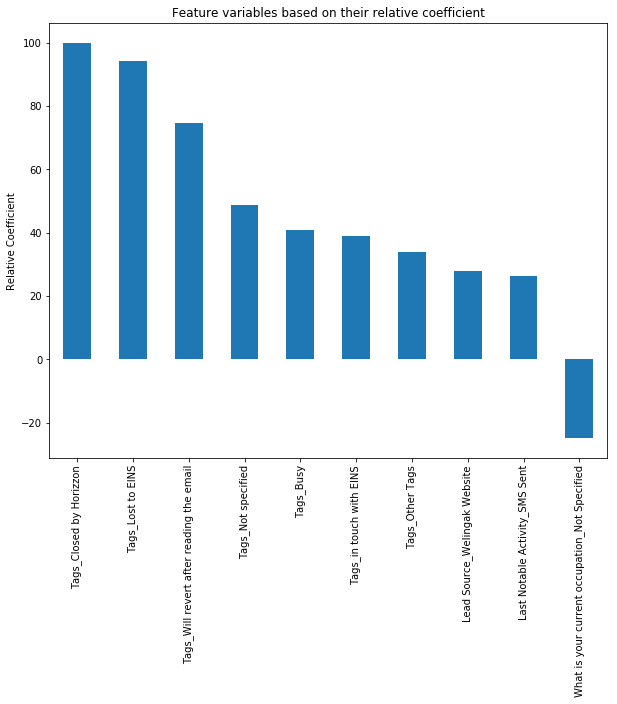

In [230]:
# Plot showing the feature variables based on their relative coefficient values
plt.figure(figsize = (10,8))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature variables based on their relative coefficient')
plt.ylabel('Relative Coefficient')
plt.show()

In [231]:
# Selecting Top 3 features which contribute most towards the probability of a lead getting converted

pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
3,Tags_Closed by Horizzon,100.00
4,Tags_Lost to EINS,94.25
7,Tags_Will revert after reading the email,74.65


### Final Observations and Recommendations

#### Optimal Cut-off value of 0.5  was used to make final predictions.
#### Evaluation Metrics like Sensitivity- Specificity as well as Precision and Recall were calculated on Train and Test Data.

### The Final Evaluation Metrics for the train Dataset:

- Accuracy : 92.37%
- Sensitivity : 92.96%
- Specificity : 92.0%
- Precision : 88.11%
- Recall : 92.96%

### The Final Evaluation Metrics for the test Dataset:

- Accuracy : 92.39%
- Sensitivity : 91.67%
- Specificity : 92.83%
- Precision : 88.46%
- Recall : 91.67%

- The Accuracy, Precision and Recall score we got from the test data are in the acceptable region

### It was found that the variables that mattered the most in the potential buyers are as follows:

1. Tags_Closed by Horizzon
2. Tags_Lost to EINS
3. Tags_Will revert after reading the email
4. Tags_Not specified
5. Tags_Busy
6. Tags_in touch with EINS
7. Tags_Other Tags
8. Lead Source_Welingak Website
9. Last Notable Activity_SMS Sent
10. What is your current occupation_Not Specified

The top three variables in the final logistic regression model which contribute most 
towards the probability of a lead getting converted are:
 
1. Tags
2. Lead Source
3. Last Notable Activity

### Conclusion:
- The Accuracy, Precision and Recall score we got from the test data are in the acceptable region
- In business terms, our model is having stability and accuracy with adaptive environment skills. Means it will adjust with the company’s requirement changes made in coming future
- As per the lead score calculated on final data, it shows conversion rate of 88%. Hence, we can say the business requirement of having 80% conversion rate was achieved. 


### Recommendations:

Based on the exploratory analysis performed on data and the predictons made using logistic regression model we would suggest below points to increase lead conversion:
- Company should target leads which are having specialization in Management fields
- The leads which were having last notable activity as 'SMS Sent', 'Modified' and 'E-mail Opened' should be targeted more as they showed higher conversion rate
- We can say that, Tags is the most important feature for lead conversion.
- We would like to recommend the company to follow up with the leads frequently and maintain their current state by assigning proper tags and not to leave this field empty as we can see the model gave importance to Tags_Not specified variable.
- Lead conversion can be improved by maximizing leads from Reference and welingak website
- Feedbacks from leads can be taken to understand their requirements and expectations.
